In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys

# Unfolding for detector (up to dressed lepton level) 

In [3]:
binDef = "_FineCoarse"
channel = "electron"

# Redirect STDOUT and STDERR
sys.stderr = open("stderr_"+channel+".txt", "w")
sys.stdout = open("stdout_"+channel+".txt", "w")

detUnfold_muon_2016 = an.ISRAnalysis("2016", channel, True, "matrix", 
                                     "Detector_Dressed_DRp1_Fiducial", "Detector_Dressed_DRp1", binDef)

Unfold_muon_2016_oneStep = an.ISRAnalysis("2016", channel, False, "matrix", 
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

In [4]:
detUnfold_muon_2016.checkMatrixCond()
detUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x6ae6e38>

In [5]:
Unfold_muon_2016_oneStep.checkMatrixCond()
Unfold_muon_2016_oneStep.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0xbcc70f8>

In [6]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

In [7]:
# Nominal
Unfold_muon_2016_oneStep.setInputHist(False, False, None, "Detector")
Unfold_muon_2016_oneStep.setUnfoldBkgs(False, "Detector")
Unfold_muon_2016_oneStep.subFake() # Subract DY fake (out of fiducial volume at gen level)

In [8]:
if channel == "muon" :
    systematics = {"ID":["IdSFUp", "IdSFDown"], "ISO":["IsoSFUp", "IsoSFDown"], "TRG":["trgSFUp", "trgSFDown"], 
                   "L1Prefie":["L1PrefireUp","L1PrefireDown"],
                   "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleBUp", "ScaleBUp", "ScaleBDown"], 
                   "AlphaS":["AlphaSUp", "AlphaSDown"],
                   "LepMom": ["NoLepMomCorr", "Nominal"]}

if channel == "electron" :
    systematics = {"ID":["IdSFUp", "IdSFDown"], "Reco":["recoSFUp","recoSFDown"], "TRG":["trgSFUp", "trgSFDown"], 
                   "L1Prefie":["L1PrefireUp","L1PrefireDown"],
                   "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleBUp", "ScaleBUp", "ScaleBDown"], 
                   "AlphaS":["AlphaSUp", "AlphaSDown"],
                   "LepMom": ["NoLepMomCorr", "Nominal"]}

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        detUnfold_muon_2016.setSystematics(sysName, postfix)
        Unfold_muon_2016_oneStep.setSystematics(sysName, postfix)

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        #print(sysName + " " + postfix)
        detUnfold_muon_2016.setInputHist(False, False, None, "Detector", True, sysName, postfix)
        detUnfold_muon_2016.setUnfoldBkgs(True, "Detector", sysName, postfix)
        
        Unfold_muon_2016_oneStep.setInputHist(False, False, None, "Detector", True, sysName, postfix)
        Unfold_muon_2016_oneStep.setUnfoldBkgs(True, "Detector", sysName, postfix)

        detUnfold_muon_2016.subFake(True, sysName,postfix)
        Unfold_muon_2016_oneStep.subFake(True, sysName,postfix)

In [9]:
detUnfold_muon_2016.doUnfold()
detUnfold_muon_2016.doUnfold(True)

Unfold_muon_2016_oneStep.doUnfold()
Unfold_muon_2016_oneStep.doUnfold(True)

In [10]:
# 
#for sysName, _ in systematics.items():
#    for massBin in range(5):
#        detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "DiPt_M"+str(massBin), massBin, True)

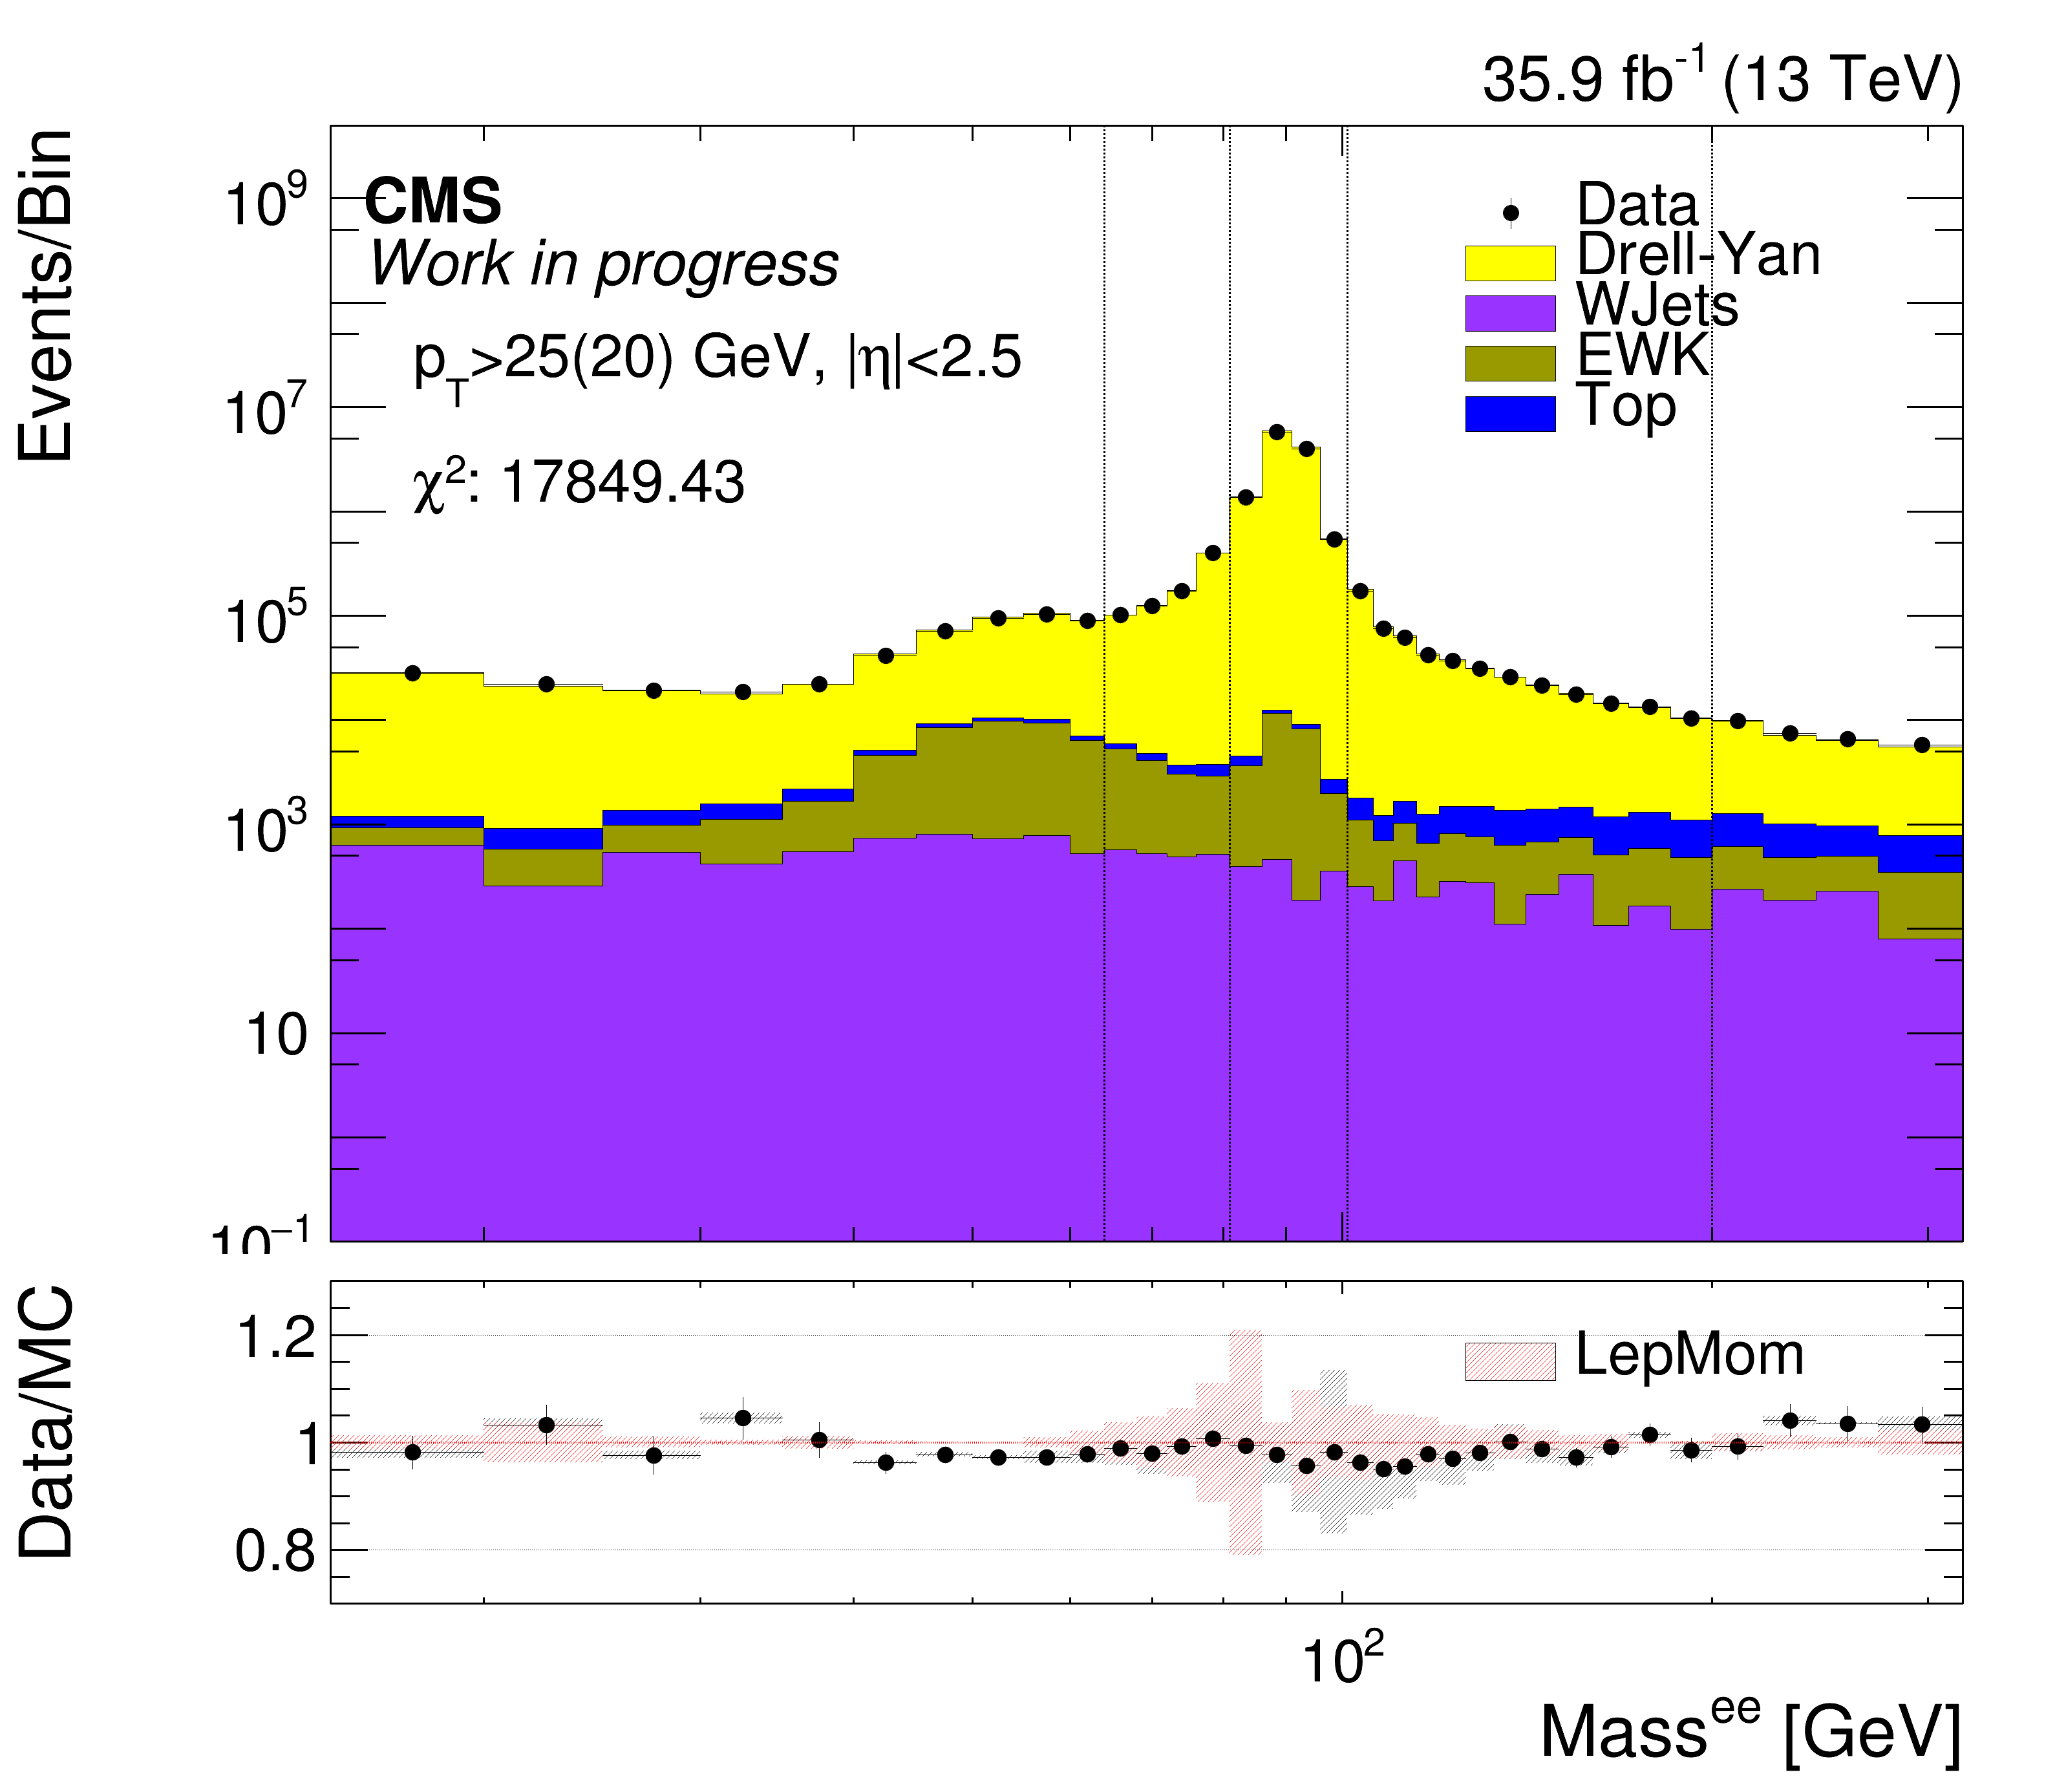

In [11]:
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "LepMom")

In [12]:
#for massBin in range(0,5):
#    detUnfold_muon_2016.drawDetPlot("Pt_1D", "Detector_M_"+str(massBin), "", True, "AlphaS", "DiPt_M"+str(massBin)+"1GeVBin", massBin)

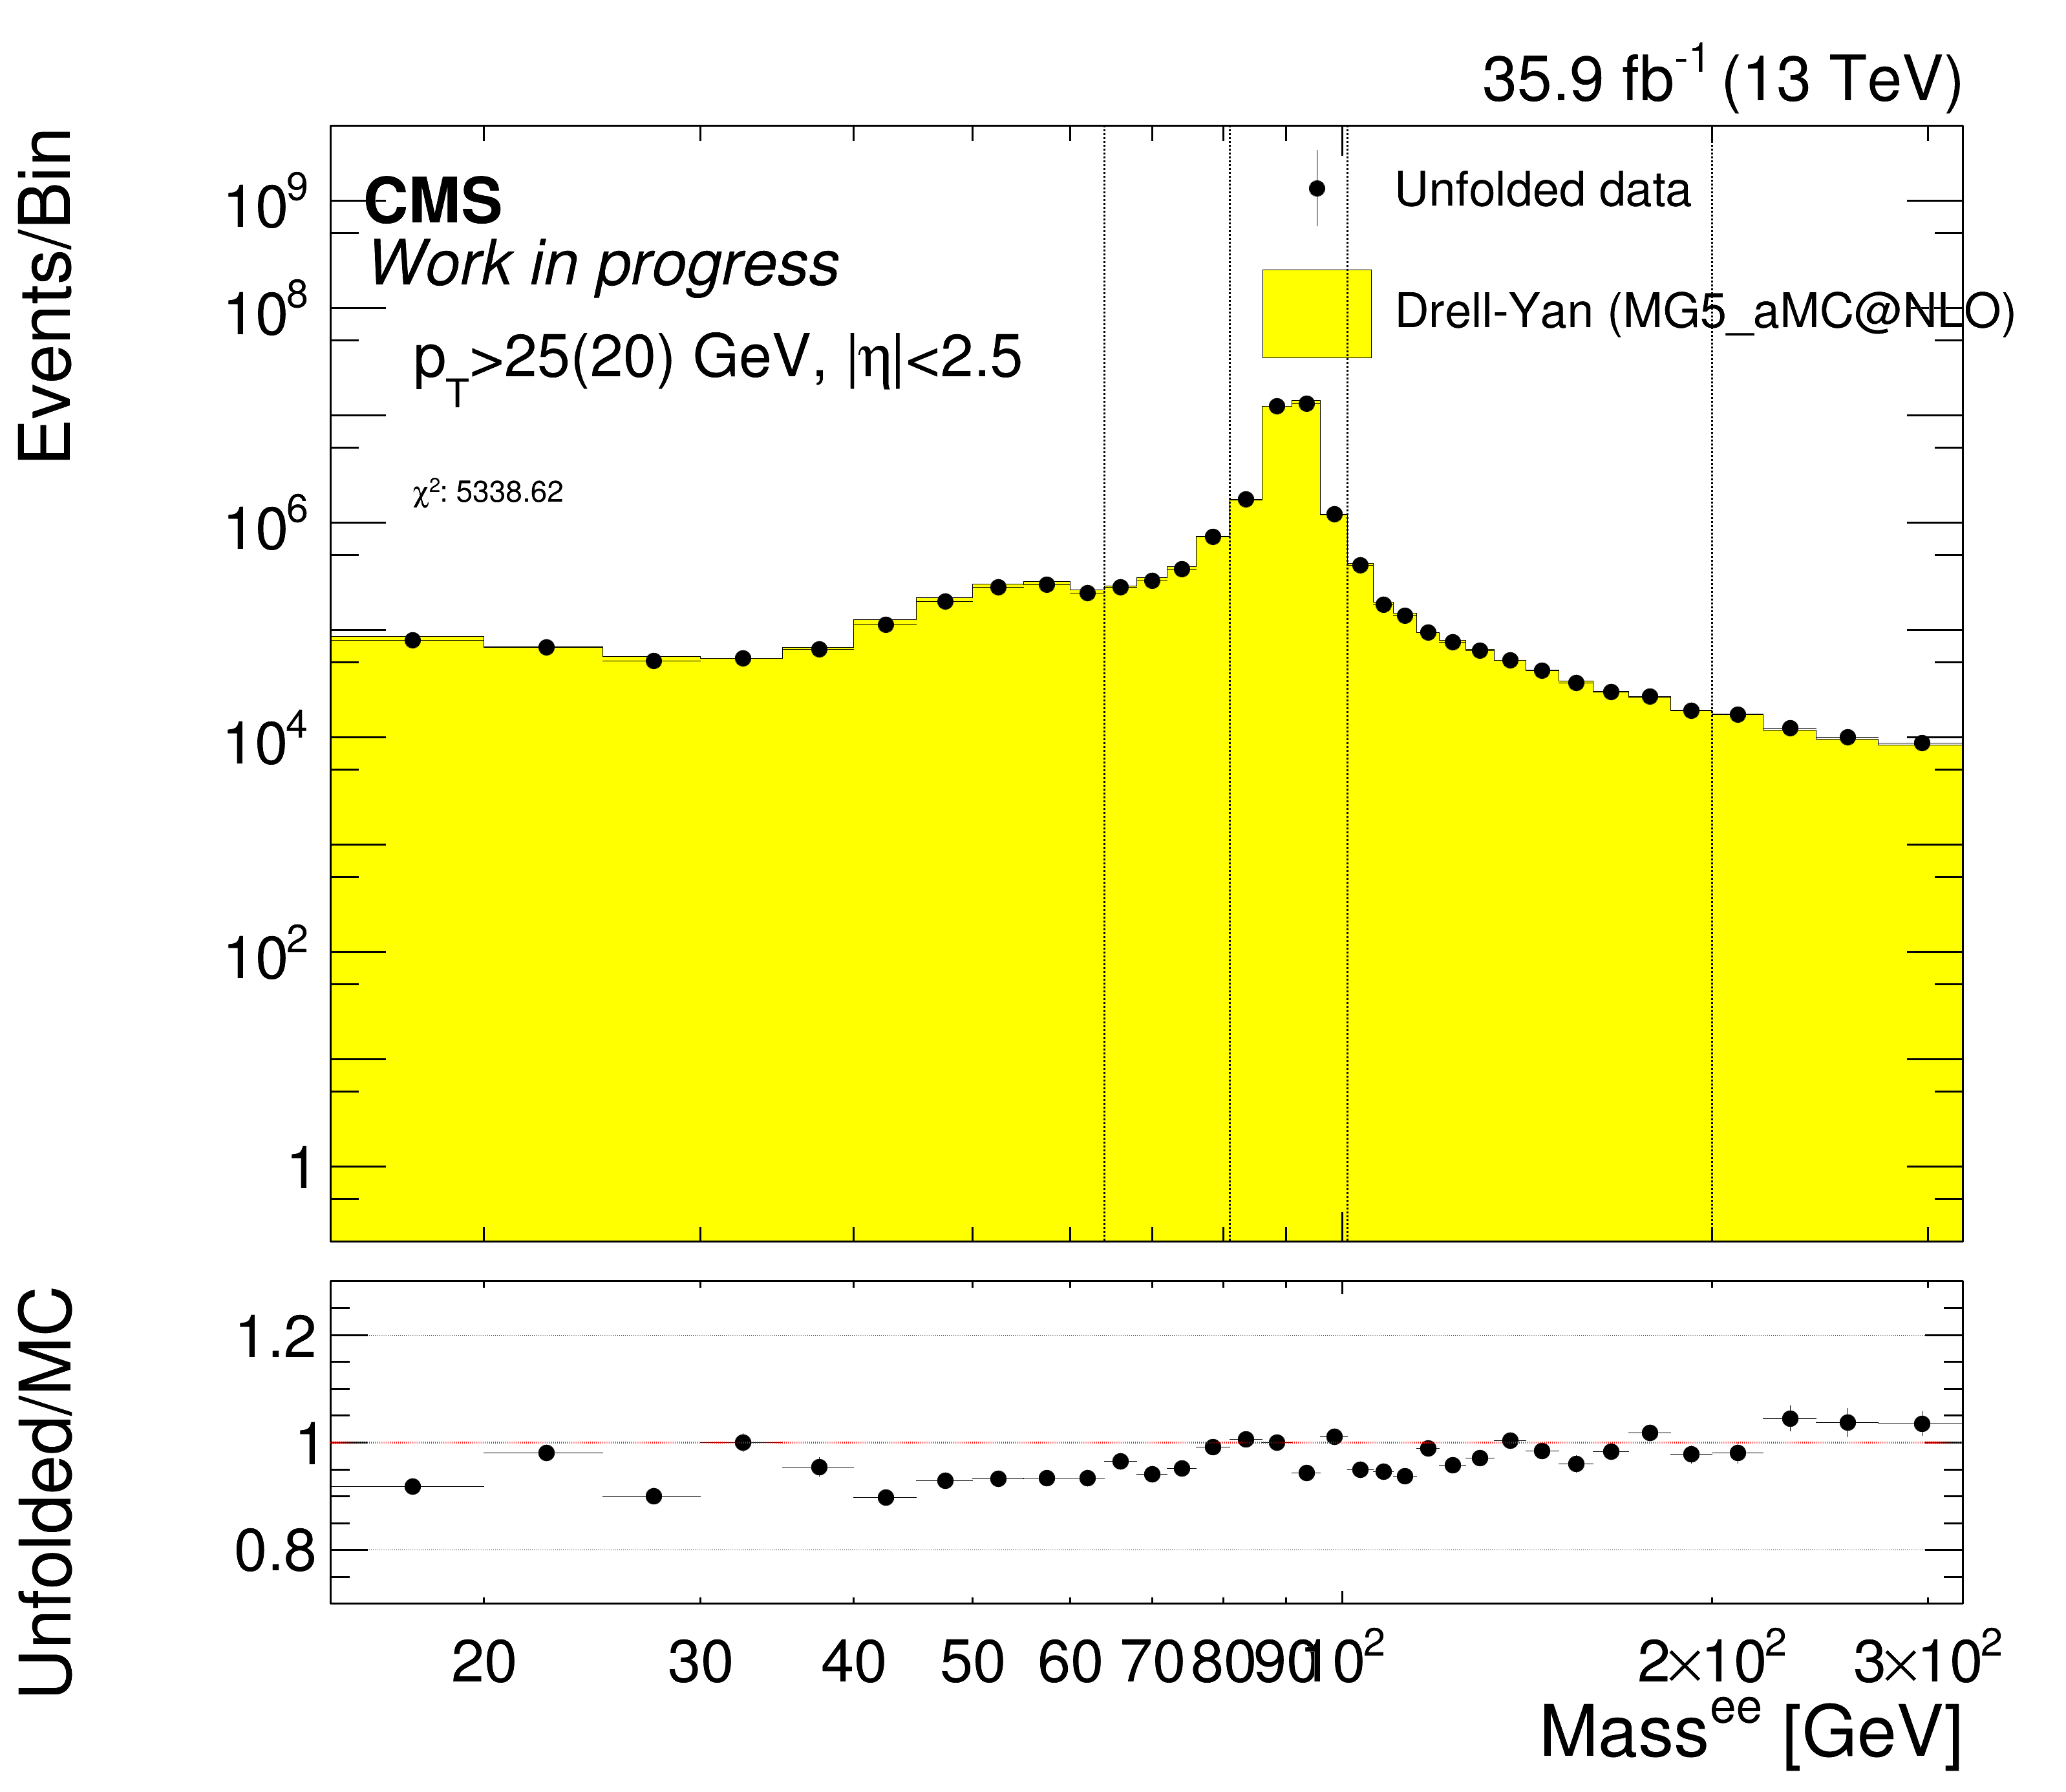

In [13]:
detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "")

In [14]:
#detUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, "", "AcceptanceCorr_Mass")

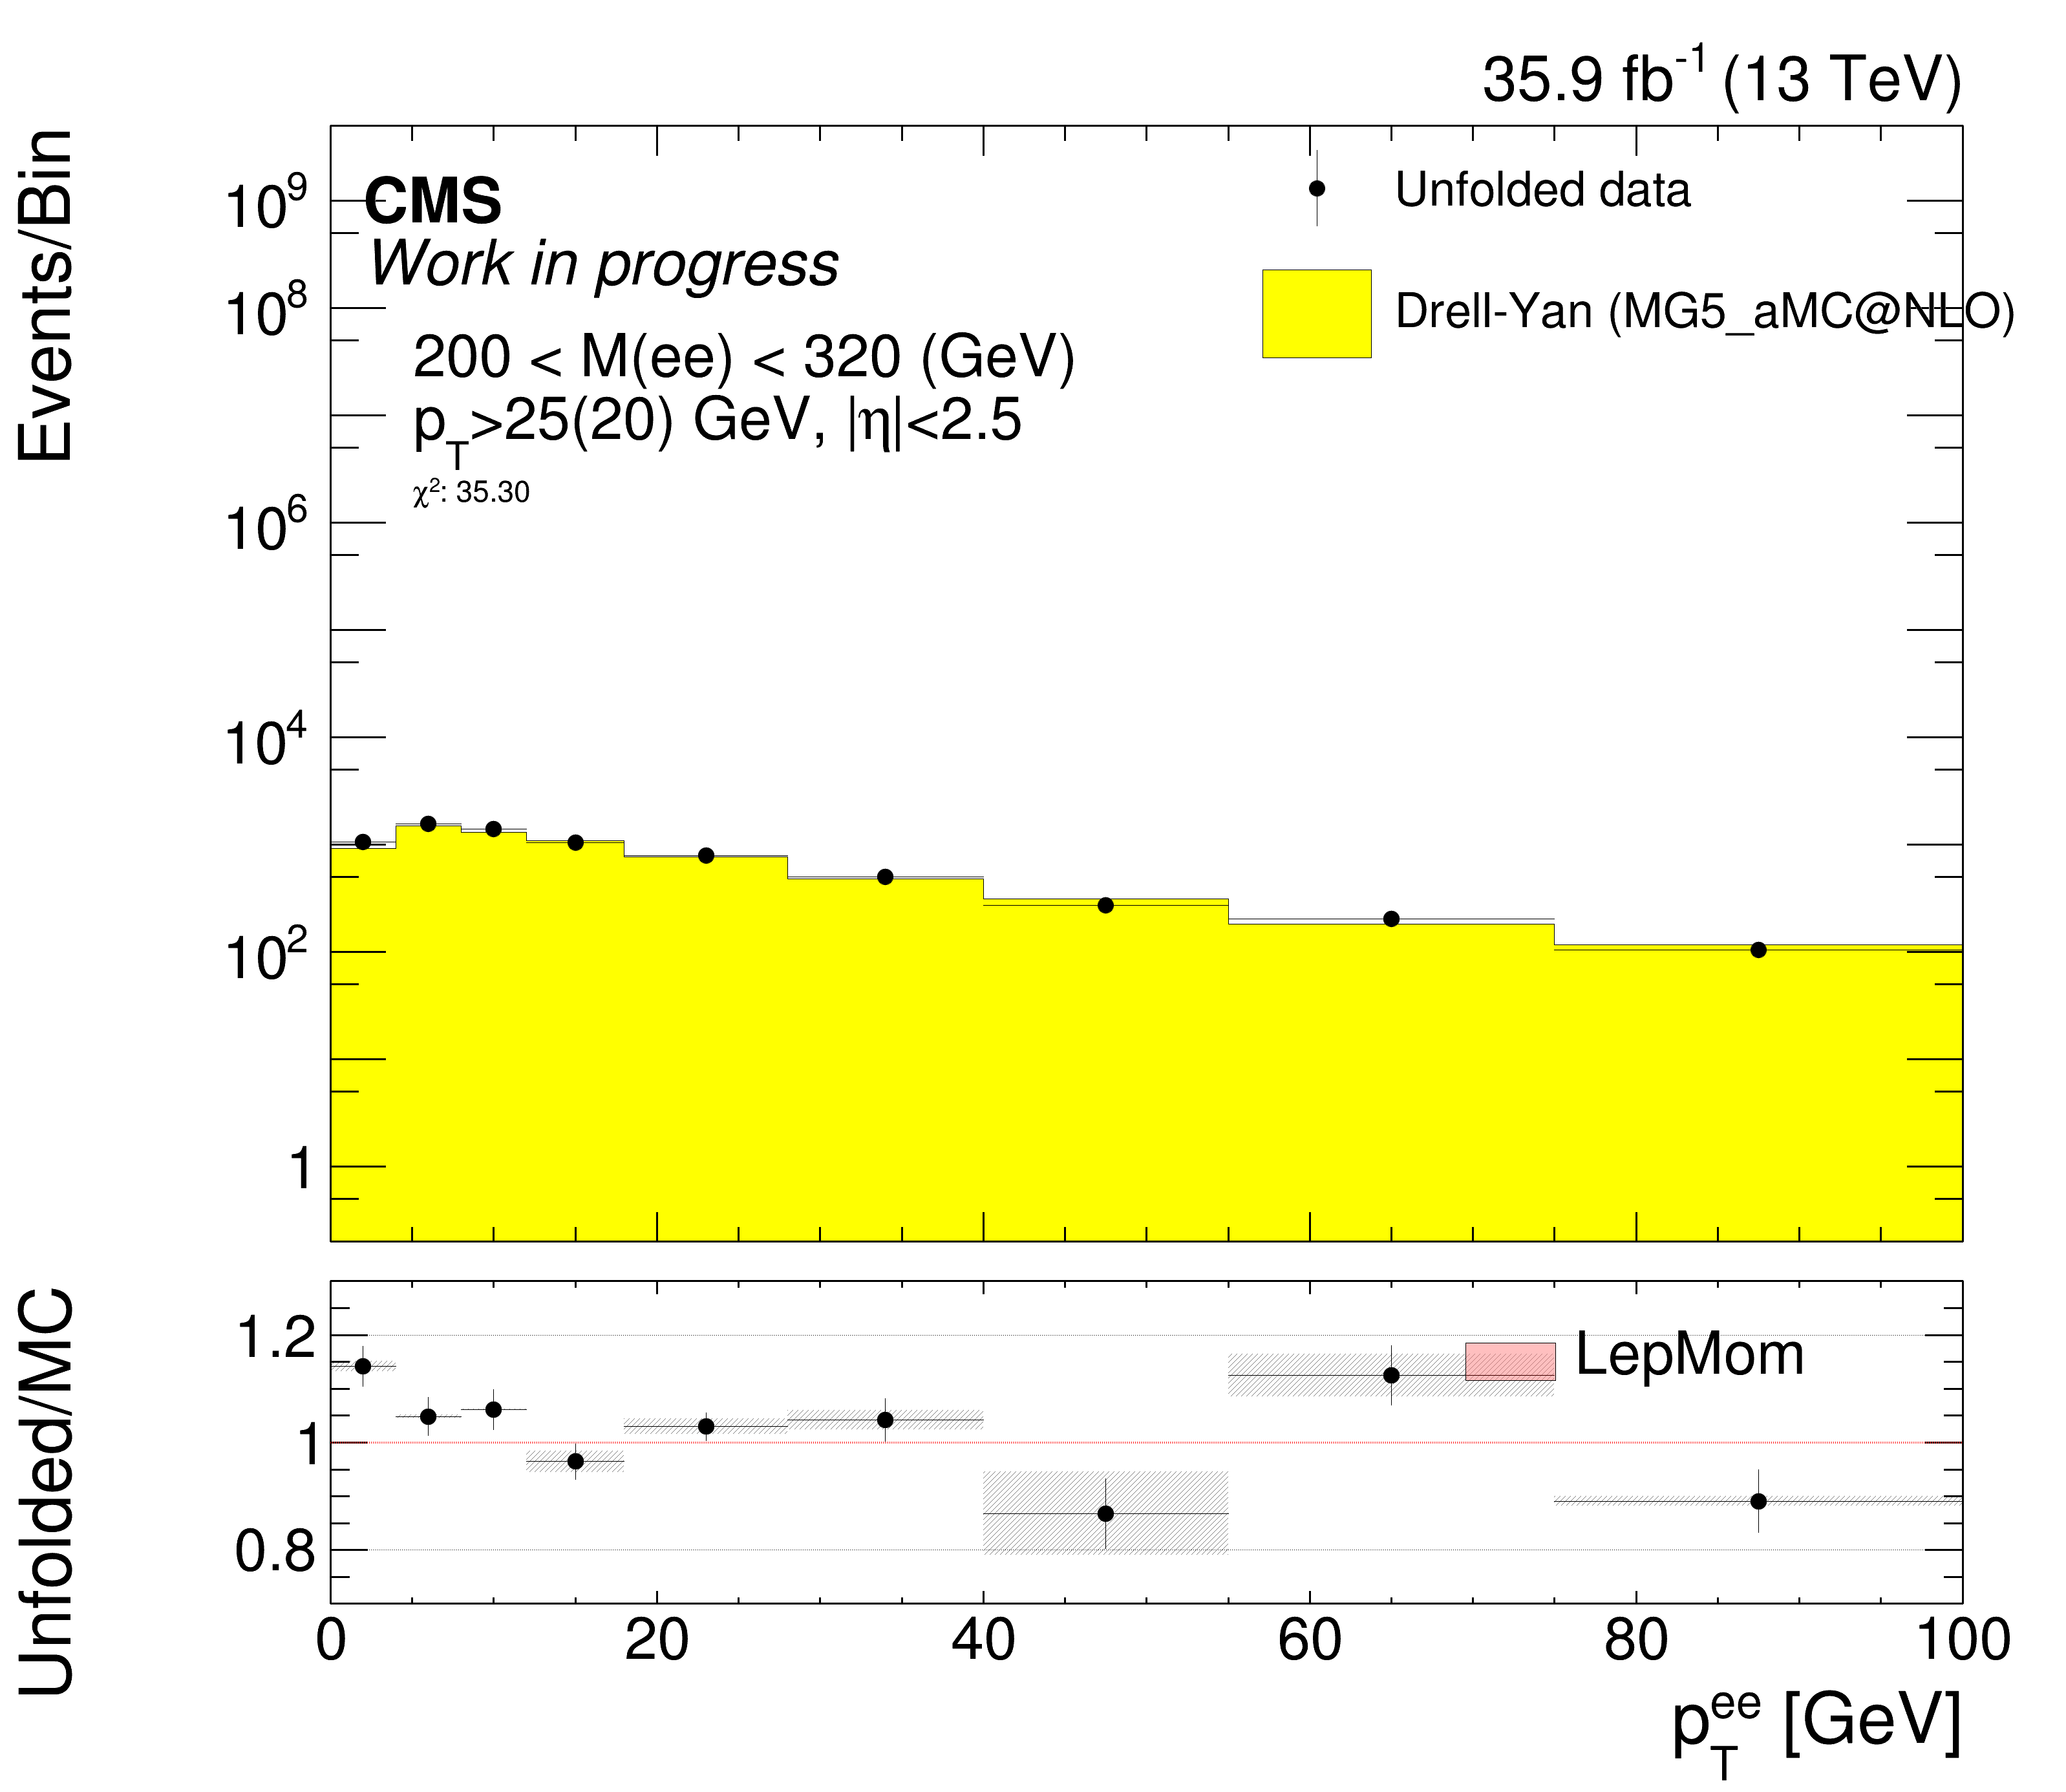

In [15]:

for massBin in range(5):
    detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "LepMom", "DetUnfDiPt_M"+str(massBin), massBin, True)

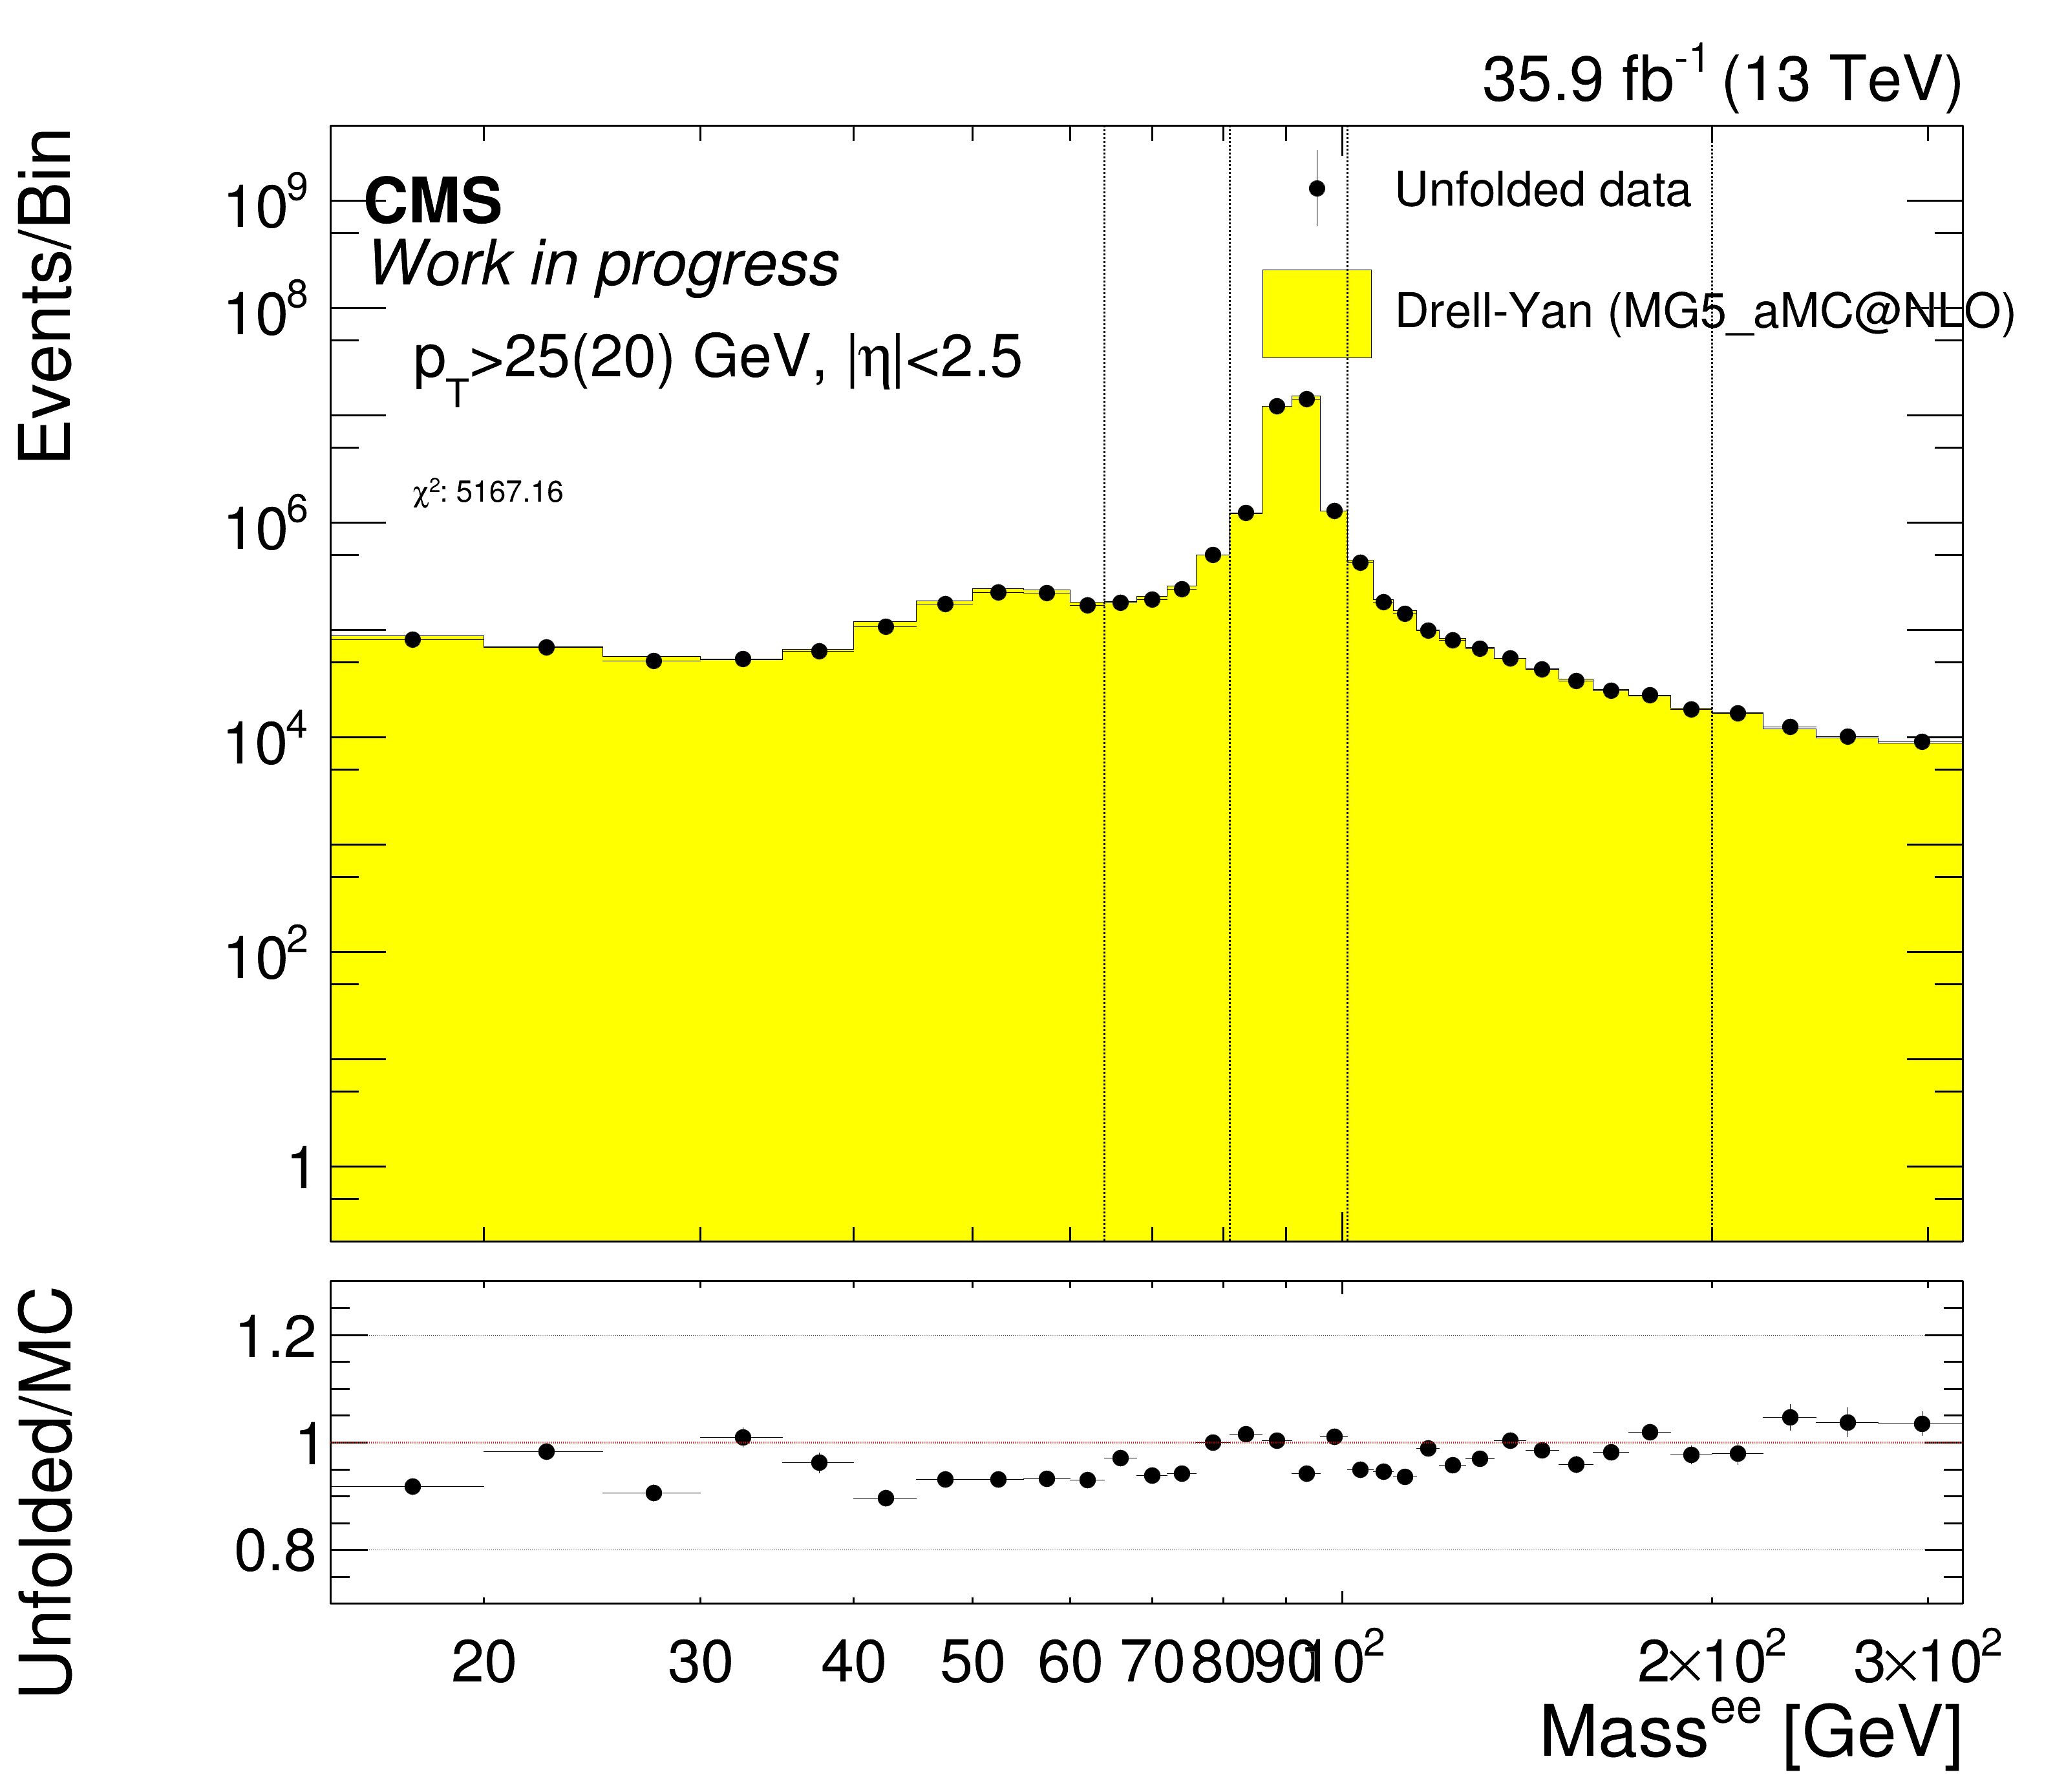

In [16]:
Unfold_muon_2016_oneStep.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "")

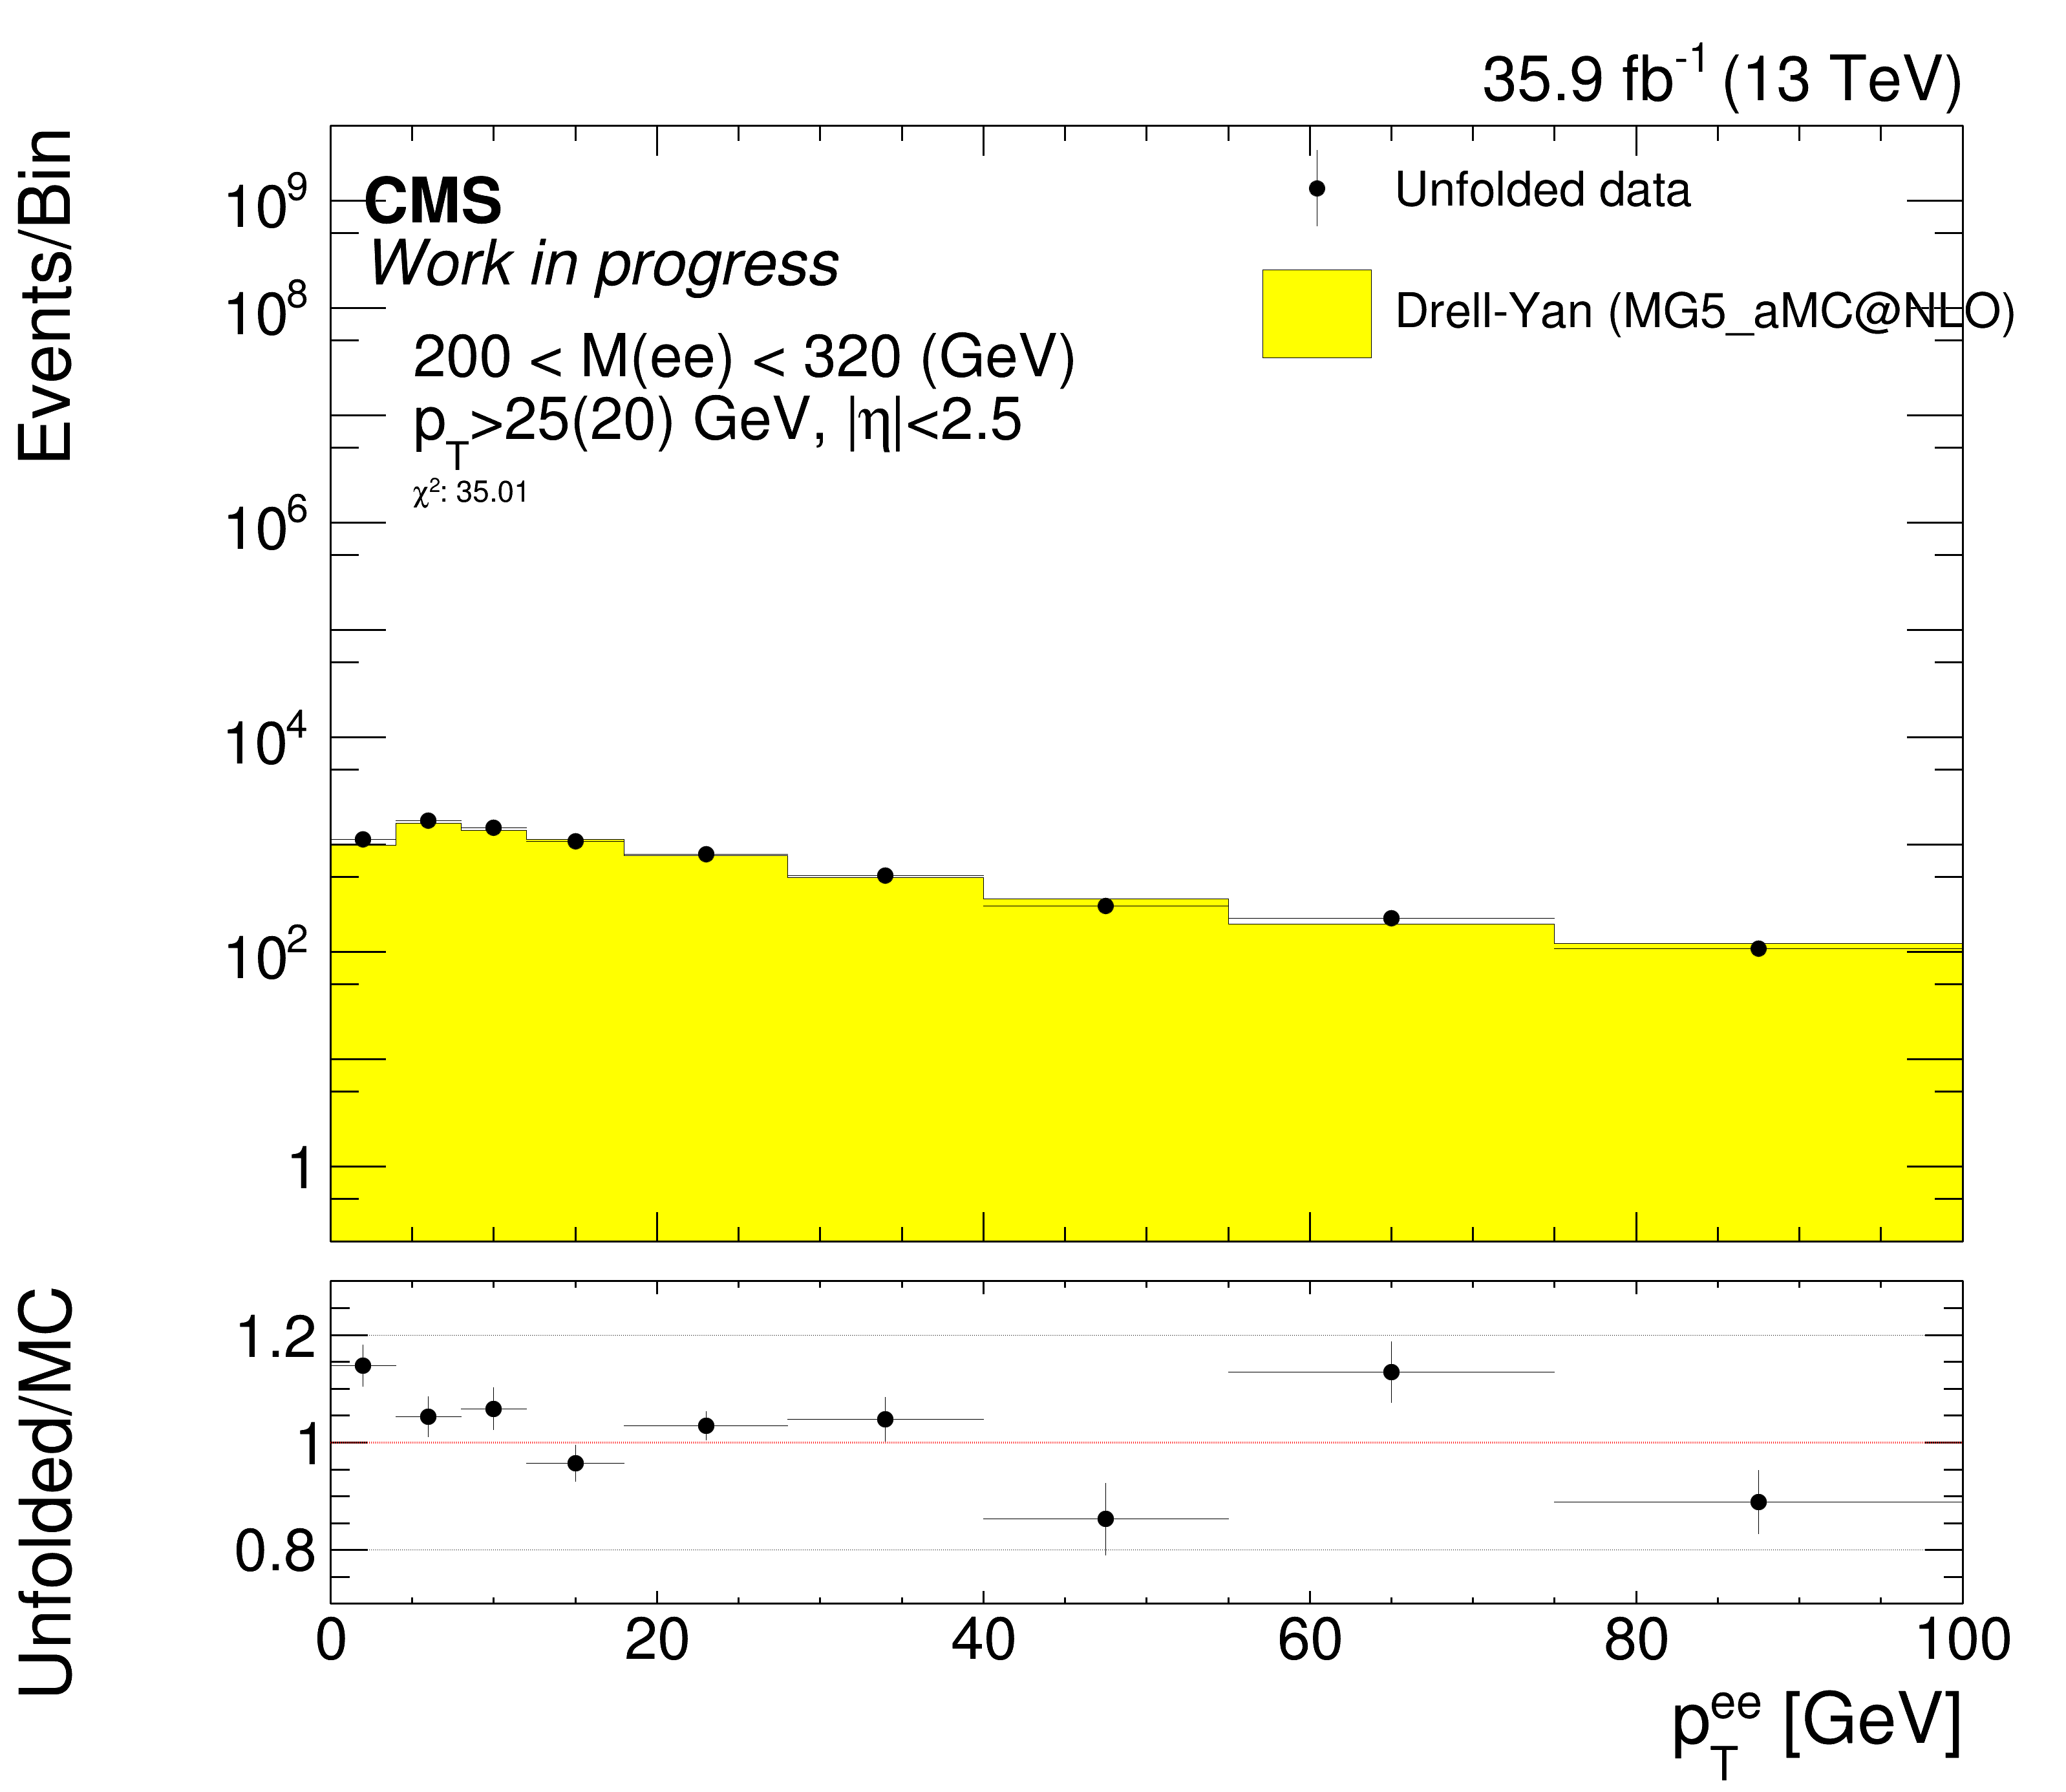

In [17]:
for massBin in range(5):
    Unfold_muon_2016_oneStep.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "OneStePUnfDiPt_M"+str(massBin), massBin, True)

In [18]:
#for massBin in range(5):
#    detUnfold_muon_2016.drawAcceptPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "AcceptPt_M"+str(massBin), massBin, True)

In [19]:
detUnfold_muon_2016.setMeanValues()
detUnfold_muon_2016.setSysMeanValues()
detUnfold_muon_2016.setSysError()
detUnfold_muon_2016.setTotSysError()

Unfold_muon_2016_oneStep.setMeanValues()
Unfold_muon_2016_oneStep.setSysMeanValues()
Unfold_muon_2016_oneStep.setSysError()
Unfold_muon_2016_oneStep.setTotSysError()

# Unfolding for QED FSR

In [20]:
binDef = "_CoarseCoarse"

phase_space = "Fiducial"
#phase_space = "FullPhase"

fsrUnfold_muon_2016 = an.ISRAnalysis("2016", channel, True, "fsr_matrix", 
                                     "Dressed_DRp1_Dressed_DR4PI_"+phase_space, "Dressed_DRp1_Dressed_DR4PI", binDef)

In [21]:
fsr_systematics = {"Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleBUp", "ScaleBUp", "ScaleBDown"], "AlphaS":["AlphaSUp", "AlphaSDown"],
                   "PDF":["PDFerror{:0>3}".format(str(i)) for i in range(1,101)],
                   "Unfold":["POWHEG","Nominal"], "FSR": ["PHOTOS","PYTHIA"]}

for sysName, postfixs in fsr_systematics.items():
    for postfix in postfixs:
        fsrUnfold_muon_2016.setSystematics(sysName, postfix) # Create TUnfoldDensity objects for systematics
        
        if sysName == "Unfold" or sysName == "FSR" or sysName == "PDF":
            fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold(), "", True, sysName, postfix)

In [22]:
fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold()) # Set nominal input using previous unfolding result
fsrUnfold_muon_2016.setFromPreviousUnfold(detUnfold_muon_2016.getISRUnfold()) # Set using previous unfolding result for systematics

In [23]:
#fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold(), "", True, "Unfold", "POWHEG")

In [24]:
fsrUnfold_muon_2016.checkMatrixCond()
fsrUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x10b26ce8>

In [25]:
fsrUnfold_muon_2016.doUnfold() # do nominal unfold
fsrUnfold_muon_2016.doUnfold(True) # do unfold for systematic

fsrUnfold_muon_2016.setMeanValues()
fsrUnfold_muon_2016.setSysMeanValues()
fsrUnfold_muon_2016.setSysError()
fsrUnfold_muon_2016.setTotSysError()

fsrUnfold_muon_2016.doStatUnfold() # doStatUnfold() must be done after setMeanValues()
fsrUnfold_muon_2016.setStatError() # Update stat. error

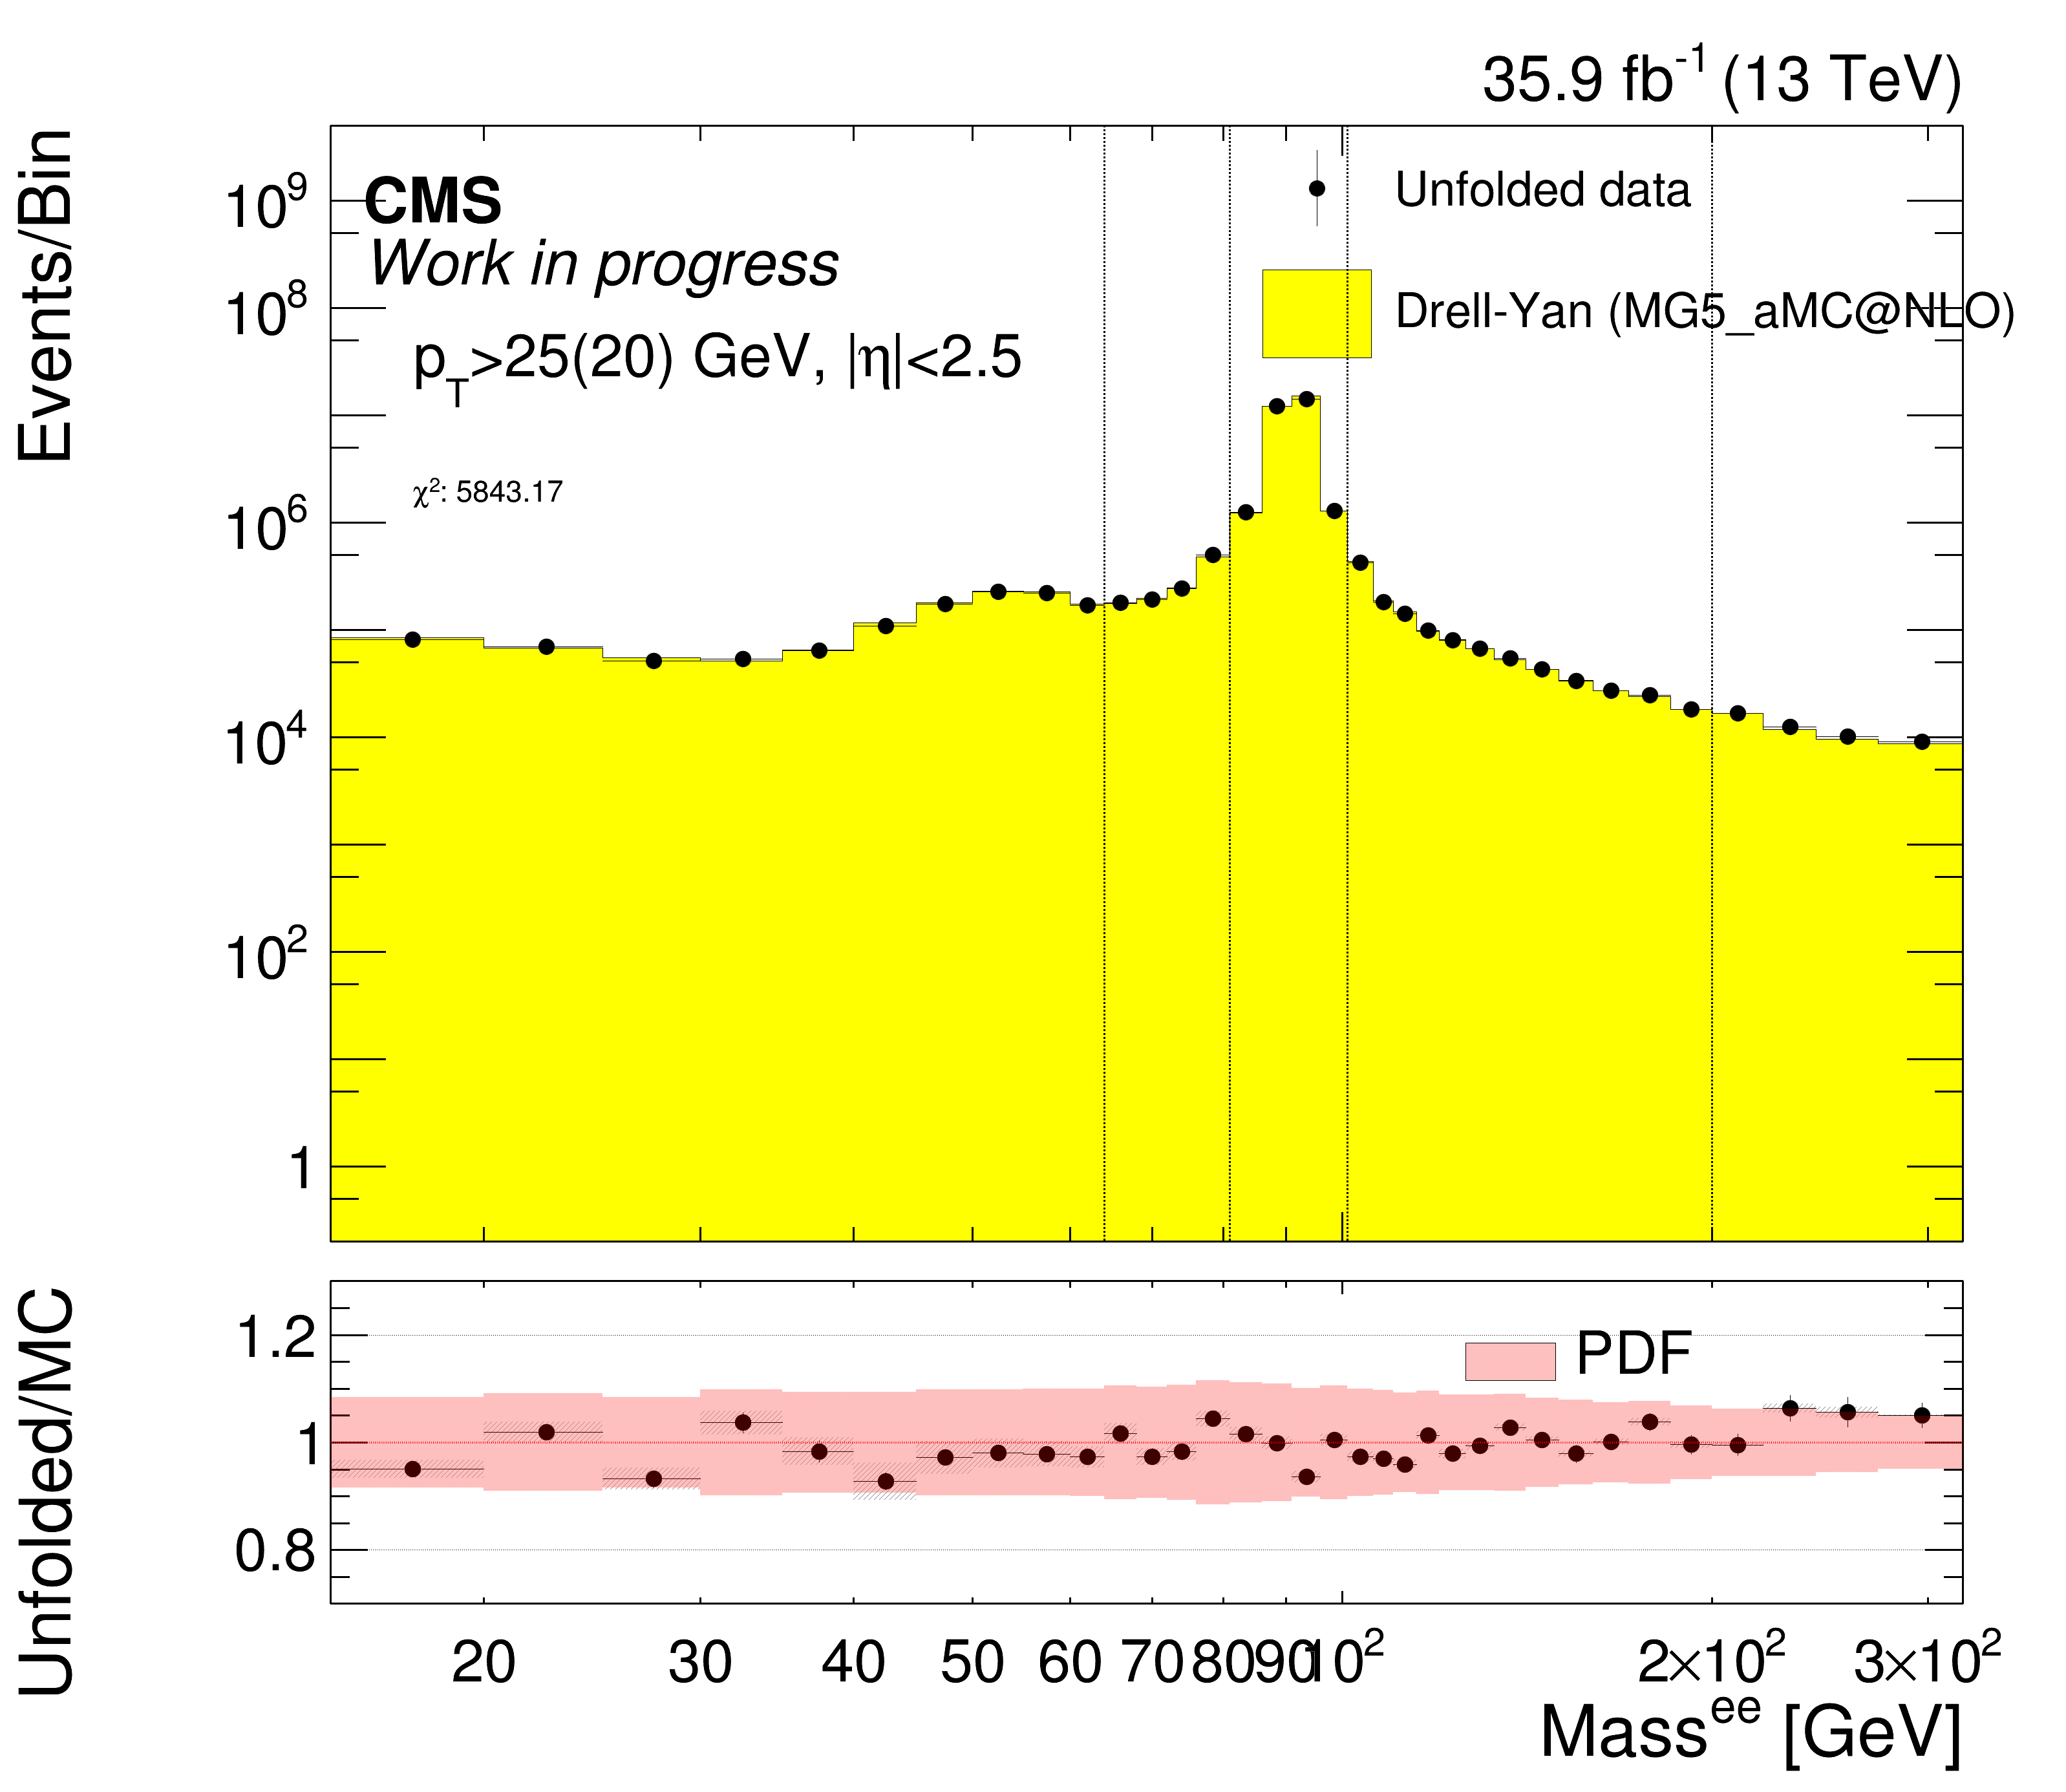

In [26]:
fsrUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "PDF")

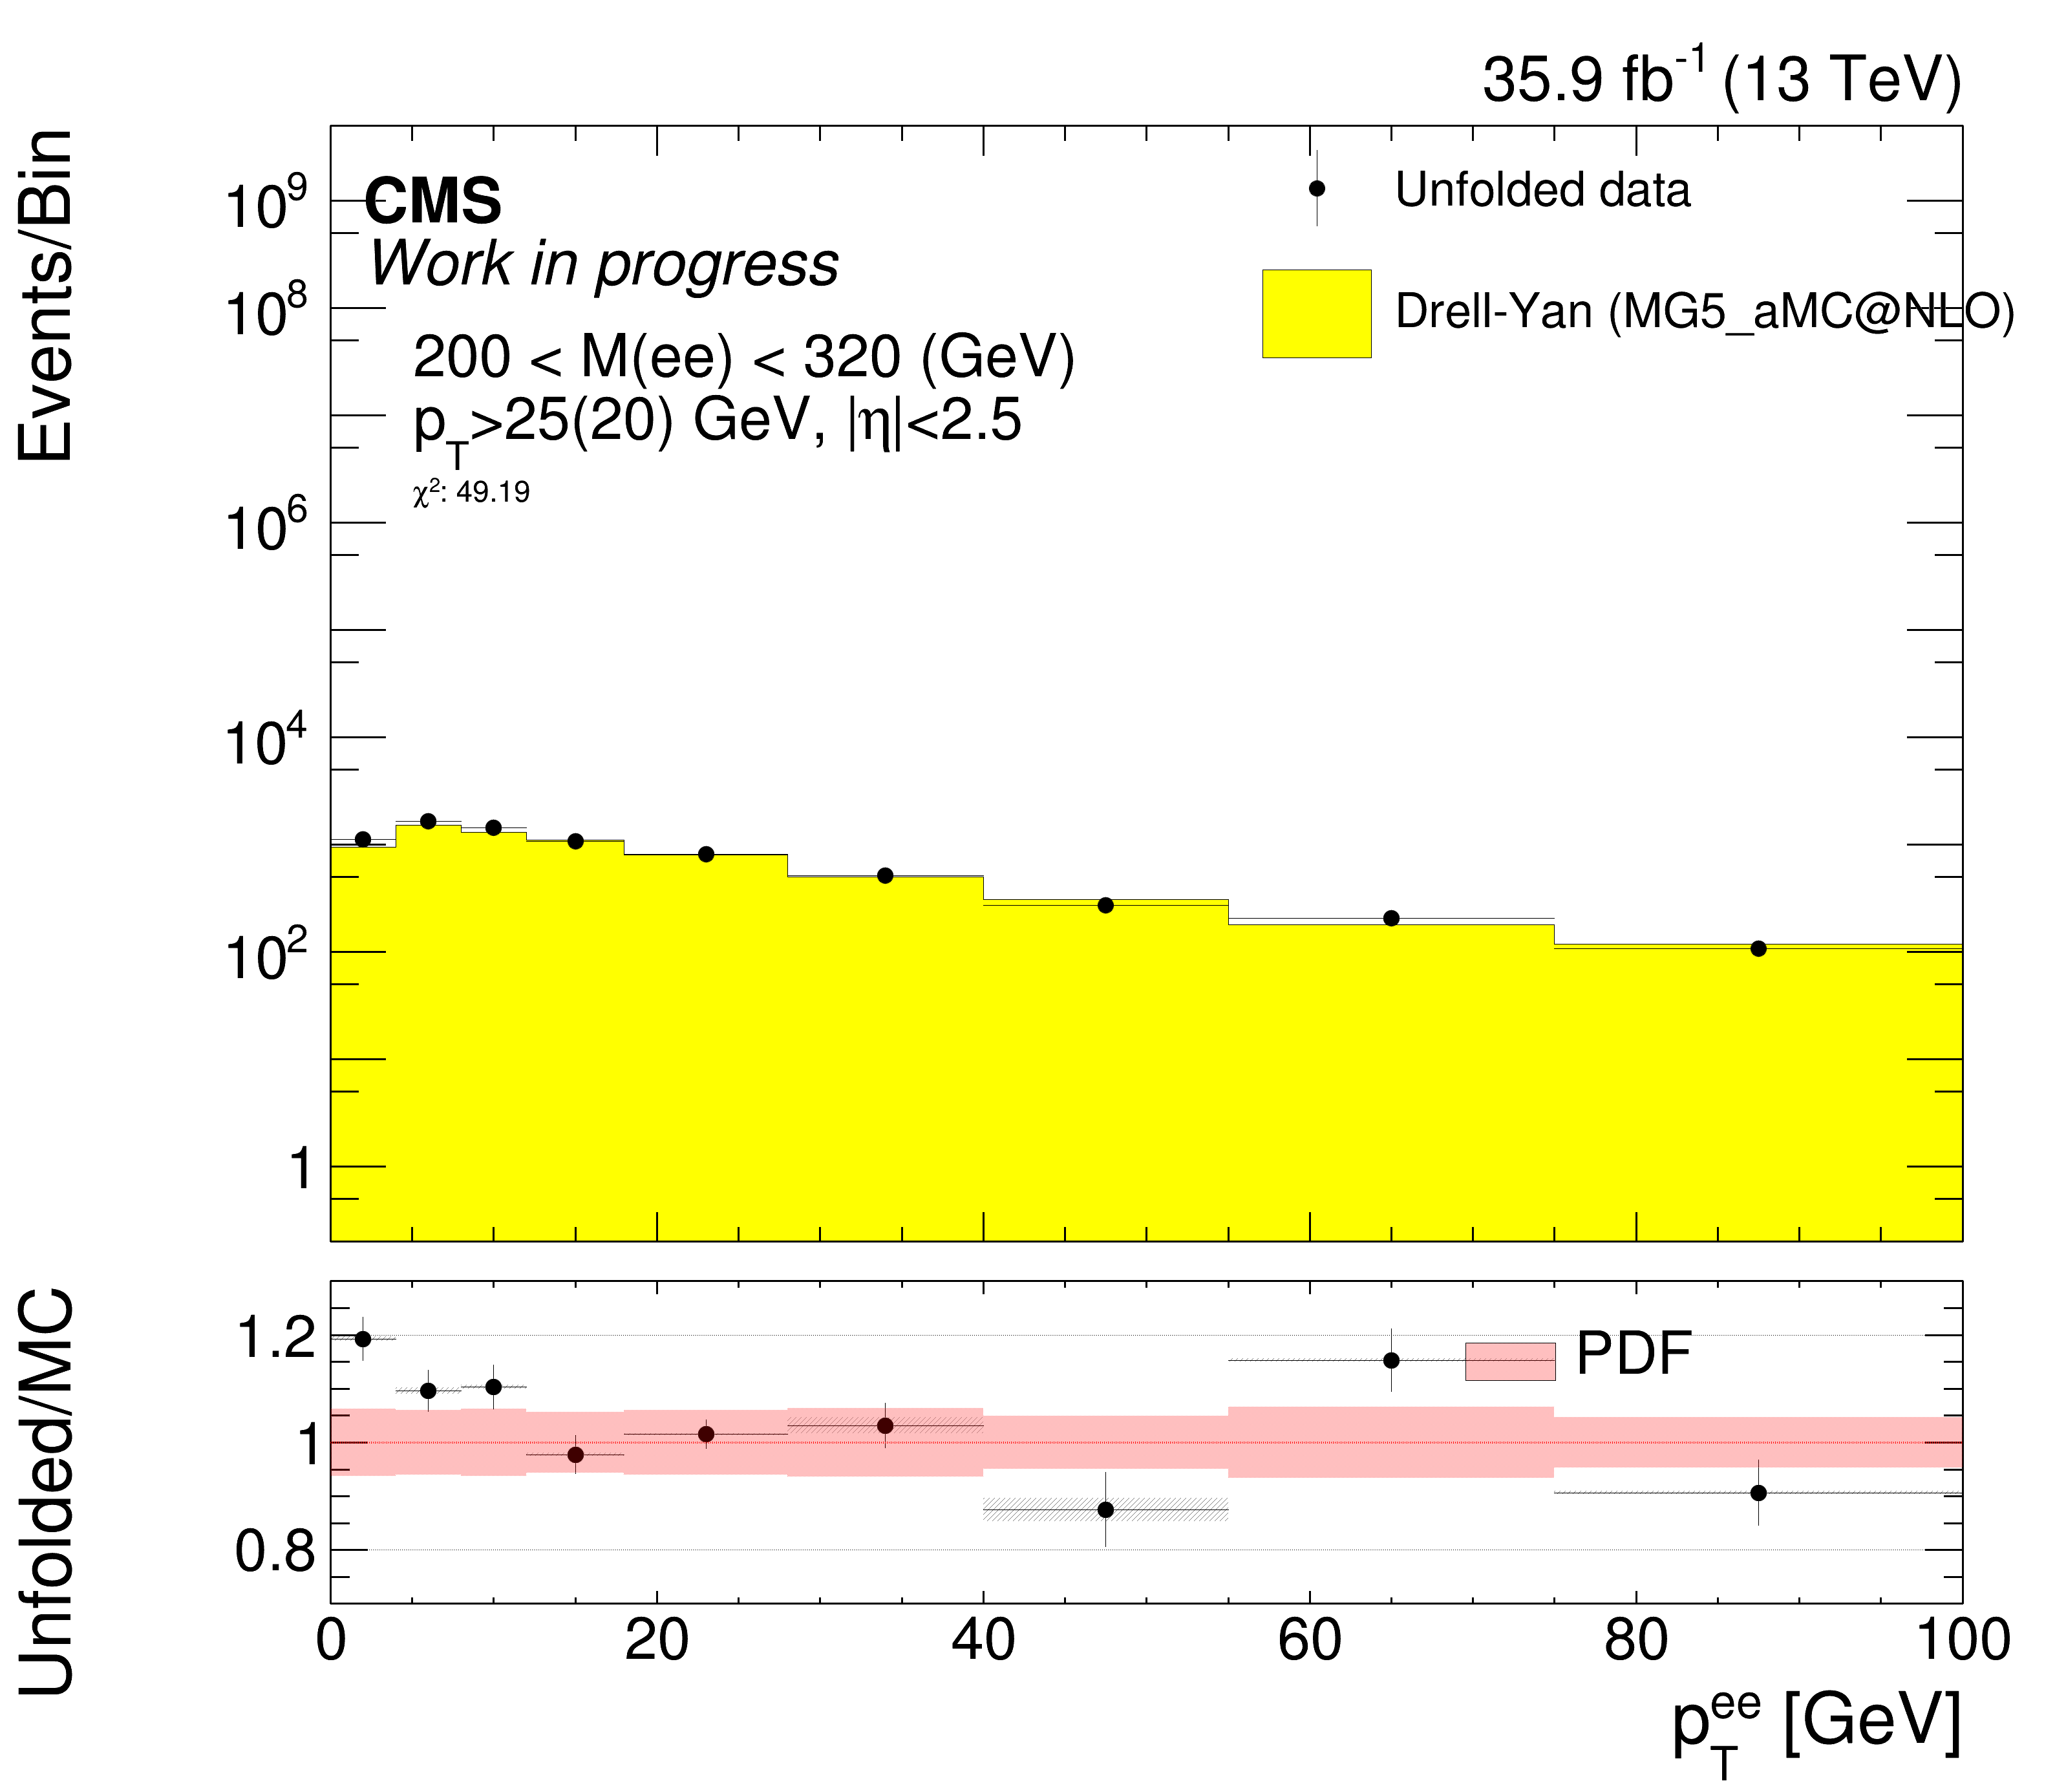

In [27]:
for massBin in range(5):
    fsrUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "PDF", "UnfDiPt_M"+str(massBin), massBin, True)

# Acceptance correction 

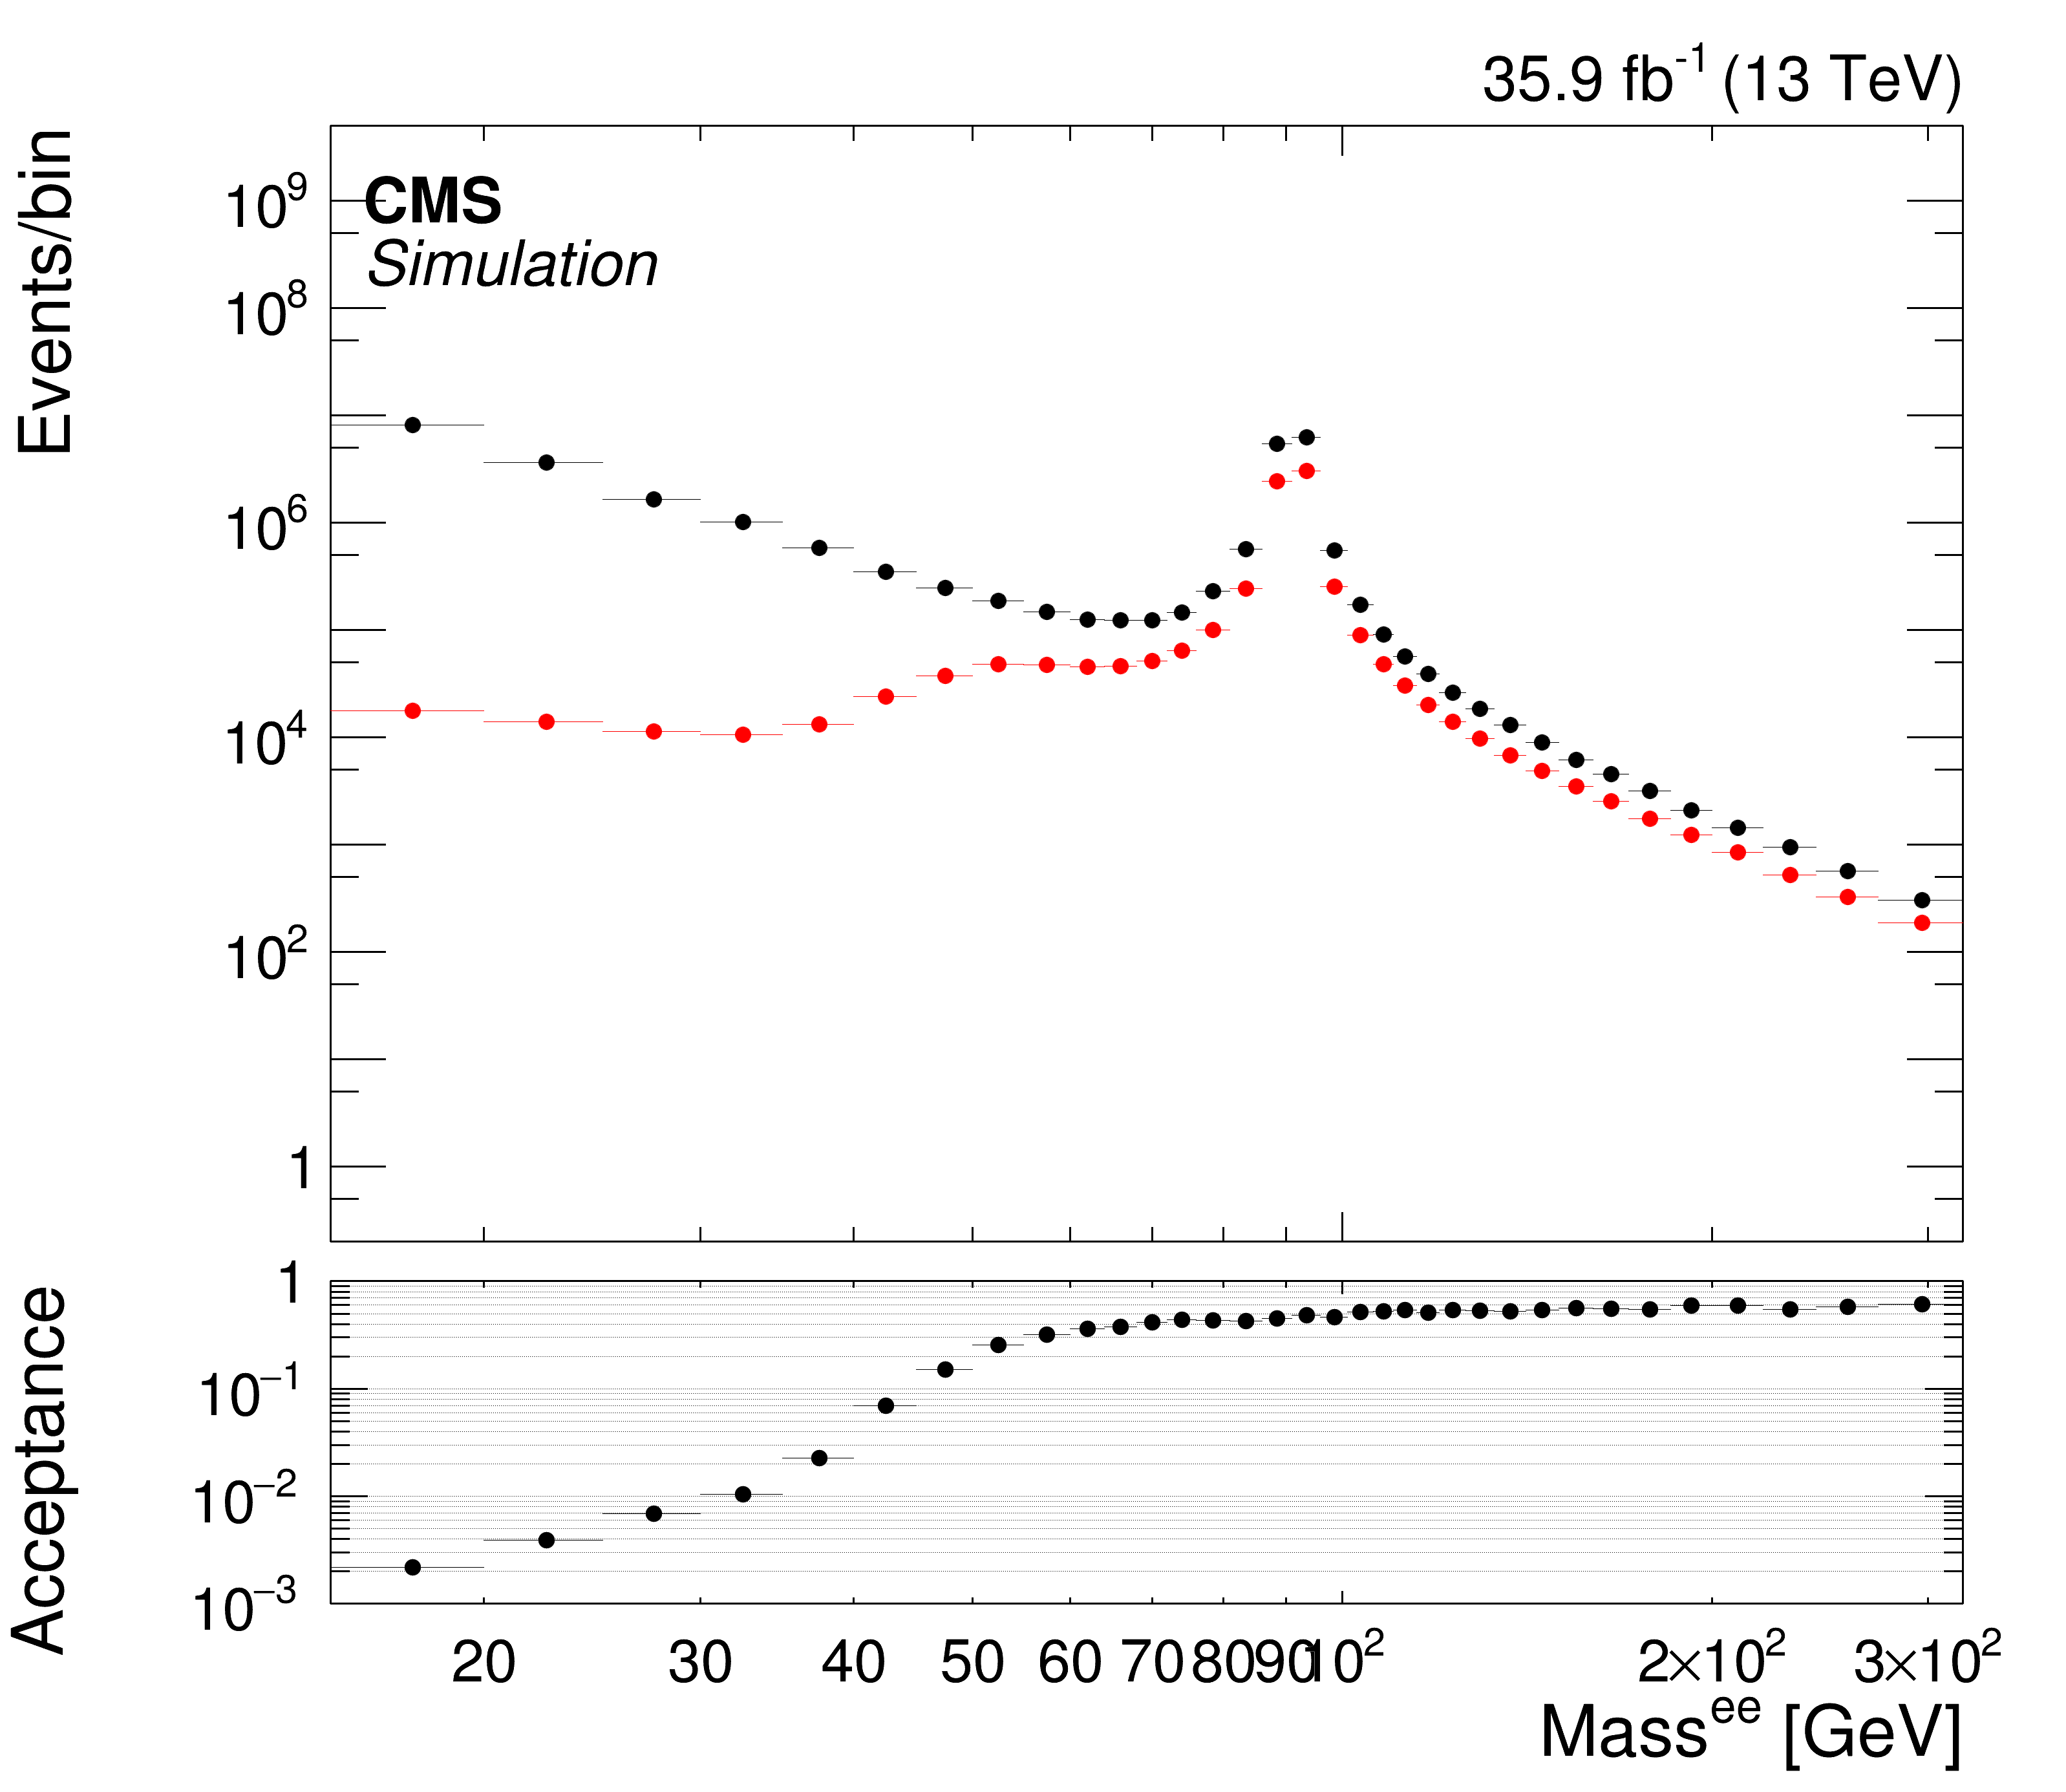

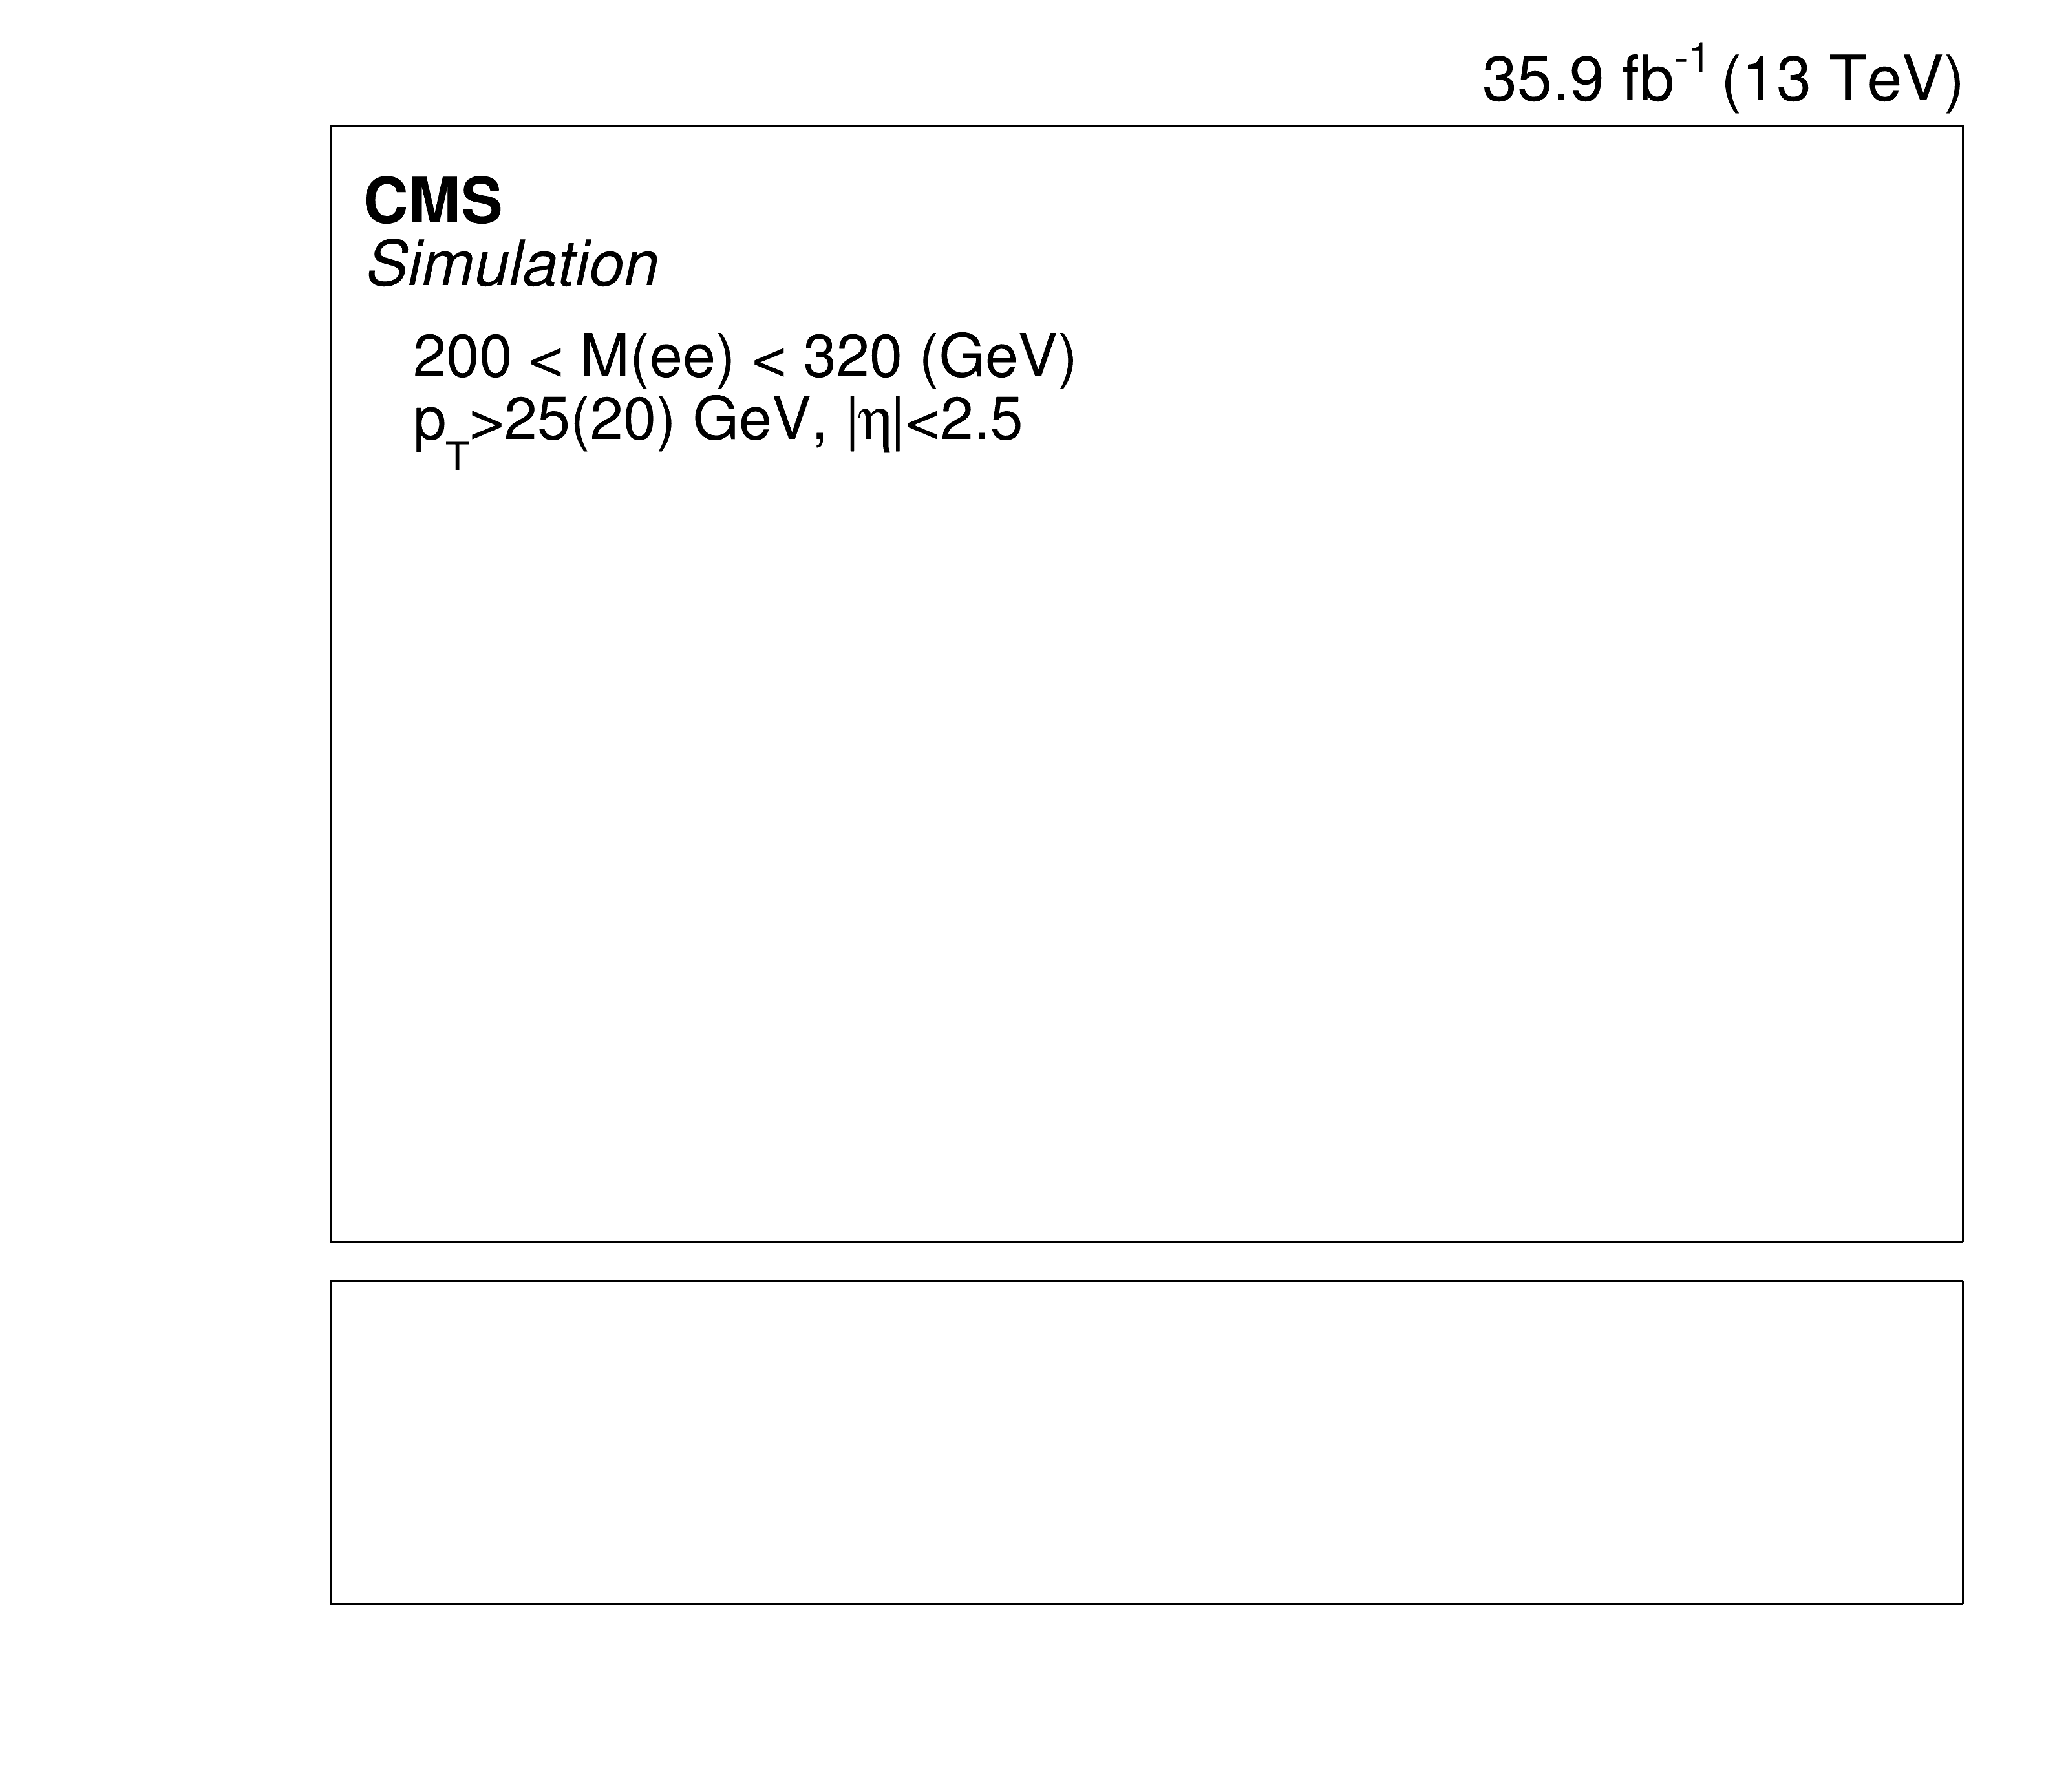

In [28]:
if phase_space == "Fiducial":
    fsrUnfold_muon_2016.doAcceptance(True)
    Unfold_muon_2016_oneStep.doAcceptance(True)

In [29]:
if phase_space == "Fiducial" :
    fsrUnfold_muon_2016.setAcceptMeanValues()
    fsrUnfold_muon_2016.setAcceptSysMeanValues()
    fsrUnfold_muon_2016.setAcceptSysError()
    fsrUnfold_muon_2016.setAcceptTotSysError()
    
    Unfold_muon_2016_oneStep.setAcceptMeanValues()
    Unfold_muon_2016_oneStep.setAcceptSysMeanValues()
    Unfold_muon_2016_oneStep.setAcceptSysError()
    Unfold_muon_2016_oneStep.setAcceptTotSysError()

In [30]:
fsrUnfold_muon_2016.printMeanValues()

In [31]:
gr_2016_muon_det =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False)

In [32]:
gr_2016_muon_det_unfold =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf")

In [33]:
gr_2016_muon_fsr =  fsrUnfold_muon_2016.getPtVsMassTGraph("2016MuonFSR", True,False,True)

In [34]:
if phase_space == "Fiducial" :
    gr_2016_muon_accept =  fsrUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False,True,True)
    gr_2016_muon_oneStep_accept =  Unfold_muon_2016_oneStep.getPtVsMassTGraph("2016MuonDet", False,True,True)

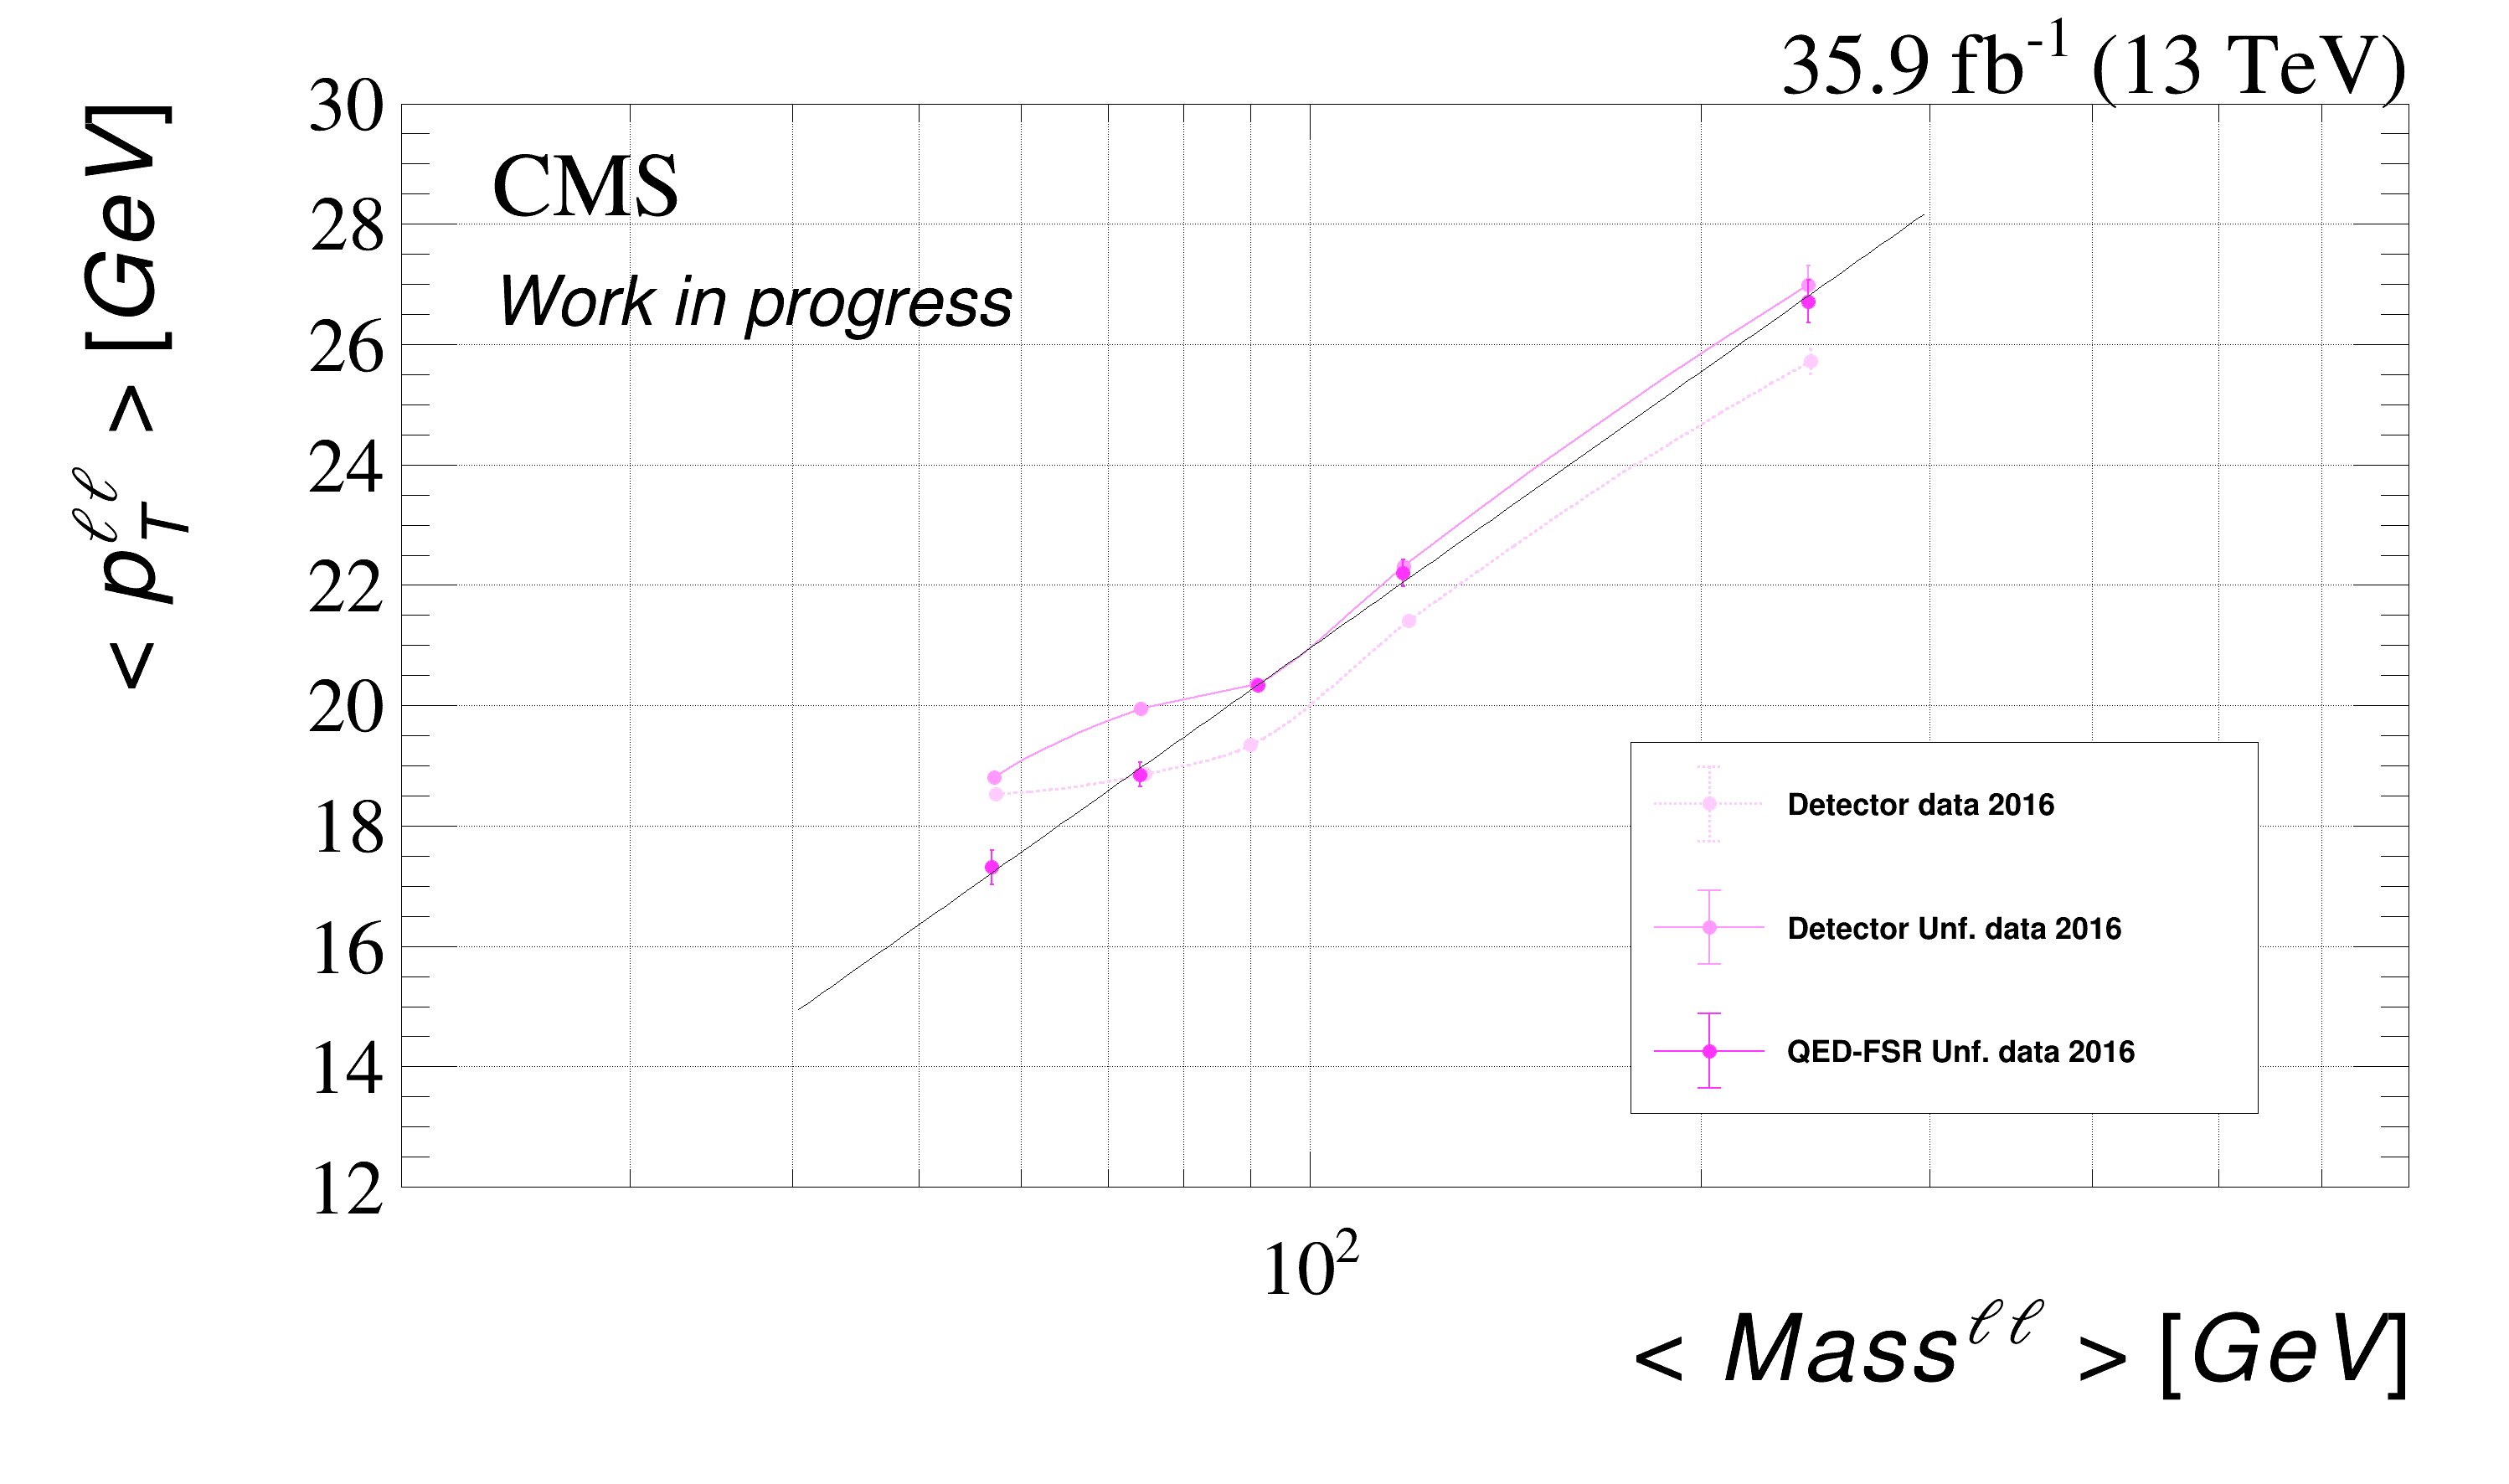

In [35]:
import pyScripts.tdrStyle as tdrStyle
import pyScripts.CMS_lumi as CMS_lumi
import ROOT as rt
markerSize = 2.0
if channel == 'electron' :
    markerColor = rt.kMagenta
else : markerColor = rt.kBlue

tdrStyle.setTDRStyle()
rt.gStyle.SetOptFit(0)

c_PtVsMass_detector = rt.TCanvas("PtVsMass_detector","PtVsMass_detector", 3000, 1800)
c_PtVsMass_detector.SetGridx()
c_PtVsMass_detector.SetGridy()
c_PtVsMass_detector.SetLogx()
c_PtVsMass_detector.SetBottomMargin(0.2)
c_PtVsMass_detector.SetTopMargin(0.07)

gr_2016_muon_det.SetTitle("2016, 2017, 2018 Detector level")
gr_2016_muon_det.Draw("APC")
gr_2016_muon_det.GetYaxis().SetRangeUser(12., 30.)
gr_2016_muon_det.GetXaxis().SetLimits(20., 700.)
gr_2016_muon_det.SetMarkerStyle(20)
gr_2016_muon_det.SetLineStyle(2)
gr_2016_muon_det.SetMarkerSize(markerSize)
gr_2016_muon_det.SetMarkerColor(markerColor-10)
gr_2016_muon_det.SetLineColor(markerColor-10)
gr_2016_muon_det.GetYaxis().SetTitleOffset(1.0)
gr_2016_muon_det.GetXaxis().SetTitleOffset(1.0)
gr_2016_muon_det.GetYaxis().SetTitle("<p^{\ell\ell}_{T}> [GeV]")
gr_2016_muon_det.GetXaxis().SetTitle("<Mass^{\ell\ell}> [GeV]")

gr_2016_muon_det_unfold.Draw("PC SAME")
gr_2016_muon_det_unfold.SetLineWidth(2)
gr_2016_muon_det_unfold.SetMarkerColor(markerColor-9)
gr_2016_muon_det_unfold.SetLineStyle(1)
gr_2016_muon_det_unfold.SetMarkerSize(markerSize)
gr_2016_muon_det_unfold.SetLineColor(markerColor-9)

gr_2016_muon_fsr.Draw("P SAME")
gr_2016_muon_fsr.SetLineWidth(2)
gr_2016_muon_fsr.SetMarkerSize(markerSize)
gr_2016_muon_fsr.SetMarkerColor(markerColor-4)
gr_2016_muon_fsr.SetLineColor(markerColor-4)

if phase_space == "Fiducial" :
    #gr_2016_muon_accept.Draw("P SAME")
    gr_2016_muon_accept.SetLineWidth(2)
    gr_2016_muon_accept.SetMarkerSize(markerSize)
    gr_2016_muon_accept.SetMarkerColor(markerColor)
    gr_2016_muon_accept.SetLineColor(markerColor)
    
    #gr_2016_muon_oneStep_accept.Draw("P SAME")
    gr_2016_muon_oneStep_accept.SetLineWidth(2)
    gr_2016_muon_oneStep_accept.SetMarkerStyle(24)
    gr_2016_muon_oneStep_accept.SetMarkerSize(markerSize)
    gr_2016_muon_oneStep_accept.SetMarkerColor(rt.kRed)
    gr_2016_muon_oneStep_accept.SetLineColor(rt.kRed)

fitLinear1 = rt.TF1("f_1", "[0]+2.*[1]*log(x)", 40., 300.);
fitLinear1.SetLineStyle(1)
fitLinear1.SetLineColor(rt.kBlack)
fitLinear1.SetLineWidth(1)
gr_2016_muon_fsr.Fit(fitLinear1, "R0")
fitLinear1.Draw("same")

if phase_space == "Fiducial" :
    fitLinear2 = rt.TF1("f_2", "[0]+2.*[1]*log(x)", 40., 300.);
    fitLinear2.SetLineStyle(1)
    fitLinear2.SetLineColor(rt.kRed)
    fitLinear2.SetLineWidth(1)
    gr_2016_muon_accept.Fit(fitLinear2, "R0")
    #fitLinear2.Draw("same")
    #print("Chi2: ", fitLinear2.GetChisquare())

legend = rt.TLegend(0.65, 0.25, 0.9, 0.5)
legend.SetBorderSize(1);
legend.AddEntry(gr_2016_muon_det, "Detector data 2016", "ple")
legend.AddEntry(gr_2016_muon_det_unfold, "Detector Unf. data 2016", "ple")
legend.AddEntry(gr_2016_muon_fsr, "QED-FSR Unf. data 2016", "ple")
#legend.AddEntry(gr_2016_muon_fsr, "QED-FSR Unf. Accept. corrected data 2016", "ple")
legend.Draw()

CMS_lumi.extraText = "Work in progress"
CMS_lumi.CMS_lumi(c_PtVsMass_detector, 4, 11)
c_PtVsMass_detector.Draw()
c_PtVsMass_detector.SaveAs("Run2_detector.png")

In [36]:
fsrUnfold_muon_2016.drawSystematics("Pt")